<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<span>
<h2>Deep Learning en el diagnóstico del Alzheimer</h1> 
<h3>Preprocesamiento Imágenes de Resonancia Magnética</h3> 
</span>

<b>Juan David Escobar Escobar.</b></br>
* Julio 2022.
* Grupo 14.

## Instalar librerías

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow-directml

In [ ]:
!pip install torch==1.4.0

In [ ]:
!pip install numpy==1.18.1

In [ ]:
!pip install pandas==0.25.3

In [ ]:
!pip install nibabel

In [ ]:
!pip install tqdm==4.42.1

In [ ]:
!pip install matplotlib

In [ ]:
!pip install opencv-python

In [ ]:
!pip install pandasql

In [ ]:
!pip install ipython-sql

In [ ]:
!pip install autopep8

## Importar librerias

In [ ]:
import tensorflow
from tensorflow import keras

import matplotlib.pyplot as plt
import nibabel as nib

import os
import cv2
import nibabel as nib
import numpy as np

import pandas as pd
import sqlite3
from sqlite3 import Error
from pandasql import sqldf

In [ ]:
# tensorflow.VERSION

## Exploración de datos

In [ ]:
"""
1. Lectura de las imagenes en formato .Nifti

2. Imprime el atributo shape que nos dice que se trata de un escaneo 3D 
   (anatómico) # y tiene 256 vóxeles en la primera dimensión, 
   256 vóxeles en la segunda dimensión y 180 vóxeles en la 
   tercera dimensión.  
   
NOTAS: 
a. Las imagenes NIFTI contienen (El encabezado con metadatos,
Los datos de la imagen y La matriz afín). 

b. En el caso de los archivos fMRI, la cuarta dimensión (casi) siempre 
representa la dimensión "tiempo". Por lo tanto, puede suponer que 
una imagen nifti de un archivo fMRI tiene 4 dimensiones, siendo las
tres primeras las dimensiones espaciales 
(similar al archivo anatómico de MRI:) 
y el último (cuarto) siendo la dimensión del tiempo ().
"""

fig = plt.figure()
path = r"C:\Users\Juan David\Documents\TFM\ADNI1_Complete 1Yr 1.5T (1)\ADNI\031_S_0568\MPR-R__GradWarp__N3__Scaled\2006-12-05_12_35_03.0\I65041\ADNI_031_S_0568_MR_MPR-R__GradWarp__N3__Scaled_Br_20070806132107428_S23625_I65041.nii"
#path = r"/Volumes/My Book/ADNI - IDA/ADNI1_Complete 1Yr 1.5T/ADNI/003_S_0981/MPR__GradWarp__B1_Correction__N3__Scaled/2007-11-05_09_14_22.0/I83316/ADNI_003_S_0981_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20071127105843939_S42293_I83316.nii"
path = 'C:/Users/Juan David/Documents/TFM/TFM/Notebooks/ELT/ADNI_114_S_0378_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20071110120508103_S21540_I81418_noneck (3).nii.gz'
path = 'D:/ADNI - IDA/ADNI1_Complete 1Yr 1.5T/ADNI/002_S_0954/MPR-R__GradWarp__B1_Correction__N3__Scaled_2/2006-10-10_15_13_04.0/I118688\ADNI_002_S_0954_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001120143792_S19979_I118688_noneck.nii.gz'

epi_img  = nib.load(path)
epi_img_data  = epi_img.get_fdata()
epi_img_hdr = epi_img.header

print(type(epi_img_data), epi_img_data)
print(type(epi_img_data.shape), epi_img_data.shape)
print(type(epi_img_hdr), epi_img_hdr)

In [ ]:
"""
La razón por la que solo imprime ceros es porque el primer 
y el último par de números en cada dimensión probablemente 
no contienen ningún cerebro (señal relacionada con), 
solo espacio vacío
"""

print(epi_img_data)

In [ ]:
"""
Es importante recordar que nuestros datos aquí no se pueden 
trazar directamente como una imagen (2D), porque nuestros 
datos (una exploración anatómica) son 3D. Sin embargo, solo
podemos trazar un solo segmento del volumen 3D, por ejemplo,
el segmento central de nuestro primer eje vóxel:
"""

mid_slice_x = epi_img_data[25, :, :]
print(mid_slice_x.shape)

In [ ]:
"""
Podemos usar matplotlib para trazar este corte como una imagen
usando la imshowfunción que viste antes:

# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
"""

plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()
mid_slice_x.shape

In [ ]:
"""
Podemos usar matplotlib para trazar este corte ubicado en el centro 
de la imagene en formato NIFTI y extraer de cada dimensión una imagen
en 2D, la cual brinda mayor información visual de cada corte del cerebro.

(106, 127, 113)
53,63,56

(131, 166, 104)
65, 83, 52
"""

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))


ax[0].imshow(epi_img_data[65, :, :], origin='lower', cmap='gray')
ax[0].set_xlabel('Axial.', fontsize=12)
ax[0].set_ylabel('Axial', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(epi_img_data[:, 83, :], origin='lower', cmap='gray')
ax[1].set_xlabel('Coronal.', fontsize=12)
ax[1].set_ylabel('Coronal', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(epi_img_data[:, :, 52], origin='lower', cmap='gray')
ax[2].set_xlabel('Sagital', fontsize=12)
ax[2].set_ylabel('Sagital', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

epi_img_data[69, :, :].T.shape, epi_img_data[:, 99, :].T.shape, epi_img_data[:, :, 99].T.shape

In [ ]:
path = r"D:\\ADNI - IDA\\ADNI1_Complete 1Yr 1.5T\\ADNI-PRE-PROCESAMIENTO\\ENTRENAMIENTO\\\PRUEBA\\ADNI_141_S_1137_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080520101821090_S49443_I106232_axial.jpg"
img1 = cv2.imread(path)


width = 200
height = 200
dim = (width, height)
 
# resize image
resized = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Extraccion, carga y transformacion (Pre-procesamiento)

In [ ]:
%run ./Helpers/prepocesamiento_helper.ipynb

In [ ]:
"""Esta funcion guarda las imagenes provenientes del corte coaxial y axial de una imagen NIFTI, en
   una sub carpeta llamada jpg y define un tamaño estandar para cada imagen de 256 x 256 px

Parameters
----------
list : numpy.ndarray
       datos numericos de una imagen en formato NIFTI (Slide 1 corte (Dimension 1: Axial))
       datos numericos de una imagen en formato NIFTI (Slide 1 corte (Dimension 2: Coronal))

Ej:
[{
    'list_volumen': [array([[0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           ...,
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           ...,
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.],
                           [0., 0., 0., ..., 0., 0., 0.]])], 
      'save_path': 'D:\\ADNI - IDA\\ADNI1_Complete 1Yr 1.5T\\ADNI
                        \\023_S_0058\\MPR__GradWarp__B1_Correction__N3__Scaled
                        \\2005-11-30_09_36_10.0\\I108504\\jpg', 
      'list_file_names': ['DNI_023_S_0058_MR_MPR__GradWarp__B1_Correction__N3__
                          Scaled_Br_20080605143248460_S10335_I108504_coronal', 
                         'DNI_023_S_0058_MR_MPR__GradWarp__B1_Correction__N3__
                         Scaled_Br_20080605143248460_S10335_I108504_axial']
}] 

Returns: 
-------
msg: Exito o Error al guardar las imagenes en formato JPG
"""

def save_slice_volume_in_jpg(list_slices_save_jpg, count_images:int):
    
    result = {'msg_result':'Exito', 'except': '' }
    for item in list_slices_save_jpg:
        
        list_volume = item["list_volumen"]
        save_path  = item["save_path"]
        list_file_names = item["list_file_names"]
        
        for index, volume in enumerate(list_volume):
  
            shape = volume.shape             
            file_name = list_file_names[index]    

            # Crear ruta de alamacenamiento en caso de que no exista
            if not os.path.exists(save_path):
                os.makedirs(save_path)        
            try:  
                # Transformaciones y pre-procesamiento de imagenes
                
                # 1. Normalizacion en escala de grises
                volume_norm = normalize_image(volume, count_images)                
                
                # 2. Almacenar imagen jpg normalizada
                new_current_flie = file_name + ".jpg"
                abs_path = os.path.join(save_path, new_current_flie)
                cv2.imwrite(abs_path, volume_norm)
                
                # 3.Resize image
                
                # 3.1 definir dimensiones estnadar para cada imagen
                width = 256 # se mantiene el width original 
                height = 256
                dim = (width, height)          
                 
                img = cv2.imread(abs_path)   
                img_resize = resize_img(img, count_images)
                   
                # 4. Reducir artefactos de ruido y suvizar imagen
                img_with_out_noise = reduce_noise(img_resize, count_images)
               
                # 5. Ecualizalizacion de contraste 
                #img_eq = equalize_contrast(img_with_out_noise, count_images)
                             
                #TODO: def segment_brain outline(img:np.ndarray, count:int) Funcion para eliminar el contorno del cerebro (cuero cabelludo y hueso)
                
                # 6. Almacenar imagen jpg pre-procesada
                cv2.imwrite(abs_path, img_with_out_noise)                
                
                print('count_img_saved:', count_images)
                print('-'*20)     
                print('volume:', volume.shape, type(volume))
                print('volume_norm:', volume_norm.shape, type(volume_norm))
                print('img_resize:', img_resize.shape, type(img_resize))
                print('img_with_out_noise:', img_with_out_noise.shape, type(img_with_out_noise))
                      
                # Mostrar lineas horizontales y verticales detectadas
                if count_images == 0:
                
                    # 1. Mostrar lineas horizontales detectadas
                    detect_horizontal_lines(img_with_out_noise, count_images)

                    # 2. Mostrar lineas verticales detectadas
                    detect_vertical_lines(img_with_out_noise, count_images)
                                
            except Exception as e:
                
                msg_result = 'Error guardando las imagen ' + abs_path + ','
                len_msg = len(msg_result)
                msg_result = msg_result[0: len_msg -1] # Eliminamos la ultima coma
                result['msg_result'] = msg_result
                result['except'] = str(e)                

        return result

## Lectura y conversion archivos en formato NIFTI a JPG

In [ ]:
""" Registrar log de cada imagen jpg almacenadaI45108.nii   

Parameters
----------
df_pd_log          : pandas.dataframe
list_file_names    : list
current_folder_nii : str
current_file_nii   : str
file               : str
fil_jpg            : str
state              : str

Retorno
----------
df_pd_log          : pandas.dataframe
"""

def registra_log_jpg(df_pd_log, list_file_names, current_folder_nii, current_file_nii, file, save_path, state, msg, current_date):
    
    list_current_folder_nii = current_folder_nii.split("\\")                   
    image_data_id = list_current_folder_nii[7]
    subject = list_current_folder_nii[4]
    path_nii = current_file_nii
    file_name_nii = file
    path_jpg = save_path
    
    for fil_jpg in list_file_names:            
        
        file_name_jpg = fil_jpg # "_coronal", "_axial"               
 
        current_row = {\
                         'image_data_id': image_data_id,\
                         'subject': subject,\
                         'path_nii': path_nii,\
                         'file_name_nii': file_name_nii,\
                         'path_jpg': path_jpg,\
                         'file_name_jpg': file_name_jpg,\
                         'state': state,\
                         'msg': msg,\
                         'creation_date': current_date\
                       }\
    
        df_pd_log = df_pd_log.append(current_row, ignore_index = True)      
        
    return df_pd_log

(131, 104)
D:/ADNI - IDA/ADNI1_Complete 1Yr 1.5T/ADNI/002_S_0954/MPR-R__GradWarp__B1_Correction__N3__Scaled_2/2006-10-10_15_13_04.0/I118688//jpg_no_neck/ADNI_002_S_0954_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001120143792_S19979_I118688_noneck_coronal.jpg
(166, 104)
D:/ADNI - IDA/ADNI1_Complete 1Yr 1.5T/ADNI/002_S_0954/MPR-R__GradWarp__B1_Correction__N3__Scaled_2/2006-10-10_15_13_04.0/I118688//jpg_no_neck/ADNI_002_S_0954_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001120143792_S19979_I118688_noneck_axial.jpg
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1
--------------------
volume: (166, 104) <class 'numpy.ndarray'>
volume_norm: (166, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>


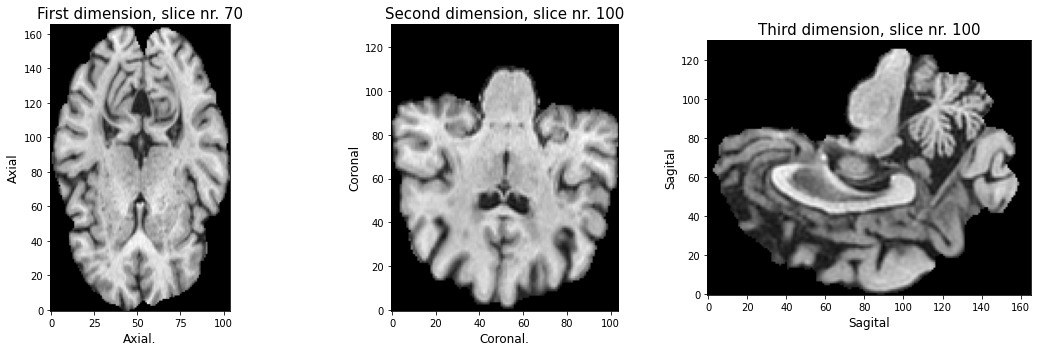

In [96]:
root = 'D:/ADNI - IDA/ADNI1_Complete 1Yr 1.5T/ADNI/002_S_0954/MPR-R__GradWarp__B1_Correction__N3__Scaled_2/2006-10-10_15_13_04.0/I118688/'
file = 'ADNI_002_S_0954_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001120143792_S19979_I118688_noneck.nii.gz'
sub_folder_new_format = "/jpg_no_neck/"

list_volumen    = []
save_path  = ''
list_file_names = []

current_file_nii = os.path.join(root, file)  # D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\023_S_0058\MPR-R__GradWarp__B1_Correction__N3__Scaled\2006-06-22_16_13_35.0\I31008\ADNI_023_S_0058_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061130142201343_S15796_I31008.nii     
current_folder_nii = os.path.join(root)      # D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\023_S_0058\MPR-R__GradWarp__B1_Correction__N3__Scaled\2006-06-22_16_13_35.0\I31008               
current_folder_new_jpg = current_folder_nii + sub_folder_new_format                                
current_file = file[0: len(file) - 7]

# 1. Leer imagen iterada
mri  = nib.load(current_file_nii)
mri_data = mri.get_fdata()
shape = mri_data.shape            

# 2. Obtener los valores de las 3D del la imagen .nii
n_i, n_j, n_k = mri_data.shape

# 3. Obtener el ejecentral de cada dimension
center_i = (n_i - 1) // 2  # // division entera
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2

# 4. Obtener cortes de cada dimension ubicados en el centro de cada dimension
#             slice_coronal_0 = mri_data[center_i, :, :] # Coronal
#             slice_axial_1 = mri_data[:, center_j, :] # Axial
#             slice_sagital_2 = mri_data[:, :, center_k] # Sagital

slice_axial_0 = mri_data[center_i, :, :] # Axial
slice_corona_1 = mri_data[:, center_j, :] # Coronal
slice_sagital_2 = mri_data[:, :, center_k] # Sagital


fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].imshow(slice_axial_0, origin='lower', cmap='gray')
ax[0].set_xlabel('Axial.', fontsize=12)
ax[0].set_ylabel('Axial', fontsize=12)
ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

ax[1].imshow(slice_corona_1, origin='lower', cmap='gray')
ax[1].set_xlabel('Coronal.', fontsize=12)
ax[1].set_ylabel('Coronal', fontsize=12)
ax[1].set_title('Second dimension, slice nr. 100', fontsize=15)

ax[2].imshow(epi_img_data[:, :, center_k], origin='lower', cmap='gray')
ax[2].set_xlabel('Sagital', fontsize=12)
ax[2].set_ylabel('Sagital', fontsize=12)
ax[2].set_title('Third dimension, slice nr. 100', fontsize=15)

fig.tight_layout()

# 5. Almacenar volumenes a guardar en formato jpg           
list_volumen.append(slice_corona_1)
list_volumen.append(slice_axial_0)

# 6. Almacenar ruta donde se va almacenar la imagen jpg
save_path = current_folder_new_jpg

# # 7. Almacenar nombre del archivo = nombre original + _coronal o _axial
current_file_coronal = current_file + "_coronal"
current_file_axial = current_file + "_axial"                  
list_file_names.append(current_file_coronal)
list_file_names.append(current_file_axial) 

# # 8. Almacenar en objeto tipo diccionario 
list_slices_save_jpg = []
current_dic = {}

current_dic["list_volumen"] = list_volumen
current_dic["save_path"] = save_path
current_dic["list_file_names"] = list_file_names

list_slices_save_jpg.append(current_dic)            
# print(list_slices_save_jpg, "\n")
# print(current_dic["list_volumen"])
# print(current_dic["save_path"])
# print(current_dic["list_file_names"])


result = {'msg_result':'Exito', 'except': '' }
for item in list_slices_save_jpg:

    list_volume = item["list_volumen"]
    save_path  = item["save_path"]
    list_file_names = item["list_file_names"]

    for index, volume in enumerate(list_volume):

        shape = volume.shape             
        file_name = list_file_names[index]    

        # Crear ruta de alamacenamiento en caso de que no exista
        if not os.path.exists(save_path):
            os.makedirs(save_path)        
        try:  
            # Transformaciones y pre-procesamiento de imagenes

            # 1. Normalizacion en escala de grises
            volume_norm = normalize_image(volume, count_images)                

            # 2. Almacenar imagen jpg normalizada
            new_current_flie = file_name + ".jpg"
            abs_path = os.path.join(save_path, new_current_flie)
            cv2.imwrite(abs_path, volume_norm)
            print(volume_norm.shape)

            # 3.Resize image

            # 3.1 definir dimensiones estnadar para cada imagen
            width = 256 # se mantiene el width original 
            height = 256
            dim = (width, height)    
            print(abs_path)

            img = cv2.imread(abs_path)   
            img_resize = resize_img(img, count_images)

            # 4. Reducir artefactos de ruido y suvizar imagen
            img_with_out_noise = reduce_noise(img_resize, count_images)

            # 5. Ecualizalizacion de contraste 
            #img_eq = equalize_contrast(img_with_out_noise, count_images)

            #TODO: def segment_brain outline(img:np.ndarray, count:int) Funcion para eliminar el contorno del cerebro (cuero cabelludo y hueso)

            # 6. Almacenar imagen jpg pre-procesada
            cv2.imwrite(abs_path, img_with_out_noise)                

            print('count_img_saved:', count_images)
            print('-'*20)     
            print('volume:', volume.shape, type(volume))
            print('volume_norm:', volume_norm.shape, type(volume_norm))
            print('img_resize:', img_resize.shape, type(img_resize))
            print('img_with_out_noise:', img_with_out_noise.shape, type(img_with_out_noise))

            # Mostrar lineas horizontales y verticales detectadas
            if count_images == 0:

                # 1. Mostrar lineas horizontales detectadas
                detect_horizontal_lines(img_with_out_noise, count_images)

                # 2. Mostrar lineas verticales detectadas
                detect_vertical_lines(img_with_out_noise, count_images)

        except Exception as e:

            msg_result = 'Error guardando las imagen ' + abs_path + ','
            len_msg = len(msg_result)
            msg_result = msg_result[0: len_msg -1] # Eliminamos la ultima coma
            result['msg_result'] = msg_result
            result['except'] = str(e)    





















# # 9. Almacenar cortes en formato .jpg en sub folder contenedor de la imagen .nii
# result = save_slice_volume_in_jpg(list_slices_save_jpg, count_images)
# count_images = count_images + 1
# print(count_images)

# # 10. Actualizar estado
# print(type(result), result)
# if result['msg_result'] == "Exito":
#     #print(msg_result, "\n",  list_file_names)
#     state = "Exito"               
# else:
#     state = "Error"              
#     print(result['msg_result'])
#     print('-'*20)
#     print(result['except'])

Generando imagenes 2D..
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 0
--------------------
volume: (126, 113) <class 'numpy.ndarray'>
volume_norm: (126, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
Original Dimensions :  (256, 256)
Original Dimensions :  (256, 256)
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 0
--------------------
volume: (158, 113) <class 'numpy.ndarray'>
volume_norm: (158, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
Original Dimensions :  (256, 256)
Original Dimensions :  (256, 256)
1
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1
--------------------
volume: (145, 114) <class 'numpy.ndarray'>
volume_norm: (145, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_no

(256, 256, 3)
(256, 256)
count_img_saved: 13
--------------------
volume: (192, 120) <class 'numpy.ndarray'>
volume_norm: (192, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
14
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 14
--------------------
volume: (139, 112) <class 'numpy.ndarray'>
volume_norm: (139, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 14
--------------------
volume: (173, 112) <class 'numpy.ndarray'>
volume_norm: (173, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
15
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 15
---------------

(256, 256, 3)
(256, 256)
count_img_saved: 27
--------------------
volume: (145, 115) <class 'numpy.ndarray'>
volume_norm: (145, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 27
--------------------
volume: (183, 115) <class 'numpy.ndarray'>
volume_norm: (183, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
28
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 28
--------------------
volume: (148, 116) <class 'numpy.ndarray'>
volume_norm: (148, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 28
--------------------
volume: (178, 116) <class 'numpy.ndarray'>
volume_

(256, 256, 3)
(256, 256)
count_img_saved: 41
--------------------
volume: (141, 114) <class 'numpy.ndarray'>
volume_norm: (141, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 41
--------------------
volume: (177, 114) <class 'numpy.ndarray'>
volume_norm: (177, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
42
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 42
--------------------
volume: (146, 116) <class 'numpy.ndarray'>
volume_norm: (146, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 42
--------------------
volume: (181, 116) <class 'numpy.ndarray'>
volume_

(256, 256, 3)
(256, 256)
count_img_saved: 55
--------------------
volume: (138, 107) <class 'numpy.ndarray'>
volume_norm: (138, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 55
--------------------
volume: (162, 107) <class 'numpy.ndarray'>
volume_norm: (162, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
56
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 56
--------------------
volume: (107, 111) <class 'numpy.ndarray'>
volume_norm: (107, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 56
--------------------
volume: (119, 111) <class 'numpy.ndarray'>
volume_

(256, 256, 3)
(256, 256)
count_img_saved: 69
--------------------
volume: (95, 106) <class 'numpy.ndarray'>
volume_norm: (95, 106) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 69
--------------------
volume: (117, 106) <class 'numpy.ndarray'>
volume_norm: (117, 106) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
70
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 70
--------------------
volume: (94, 105) <class 'numpy.ndarray'>
volume_norm: (94, 105) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 70
--------------------
volume: (118, 105) <class 'numpy.ndarray'>
volume_norm

(256, 256, 3)
(256, 256)
count_img_saved: 83
--------------------
volume: (133, 115) <class 'numpy.ndarray'>
volume_norm: (133, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 83
--------------------
volume: (177, 115) <class 'numpy.ndarray'>
volume_norm: (177, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
84
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 84
--------------------
volume: (147, 115) <class 'numpy.ndarray'>
volume_norm: (147, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 84
--------------------
volume: (175, 115) <class 'numpy.ndarray'>
volume_

(256, 256, 3)
(256, 256)
count_img_saved: 97
--------------------
volume: (148, 113) <class 'numpy.ndarray'>
volume_norm: (148, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 97
--------------------
volume: (170, 113) <class 'numpy.ndarray'>
volume_norm: (170, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
98
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 98
--------------------
volume: (136, 109) <class 'numpy.ndarray'>
volume_norm: (136, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 98
--------------------
volume: (169, 109) <class 'numpy.ndarray'>
volume_

(256, 256, 3)
(256, 256)
count_img_saved: 110
--------------------
volume: (163, 117) <class 'numpy.ndarray'>
volume_norm: (163, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
111
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 111
--------------------
volume: (135, 117) <class 'numpy.ndarray'>
volume_norm: (135, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 111
--------------------
volume: (161, 117) <class 'numpy.ndarray'>
volume_norm: (161, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
112
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 112
---------

(256, 256, 3)
(256, 256)
count_img_saved: 124
--------------------
volume: (141, 107) <class 'numpy.ndarray'>
volume_norm: (141, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 124
--------------------
volume: (160, 107) <class 'numpy.ndarray'>
volume_norm: (160, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
125
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 125
--------------------
volume: (148, 117) <class 'numpy.ndarray'>
volume_norm: (148, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 125
--------------------
volume: (170, 117) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 137
--------------------
volume: (173, 125) <class 'numpy.ndarray'>
volume_norm: (173, 125) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
138
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 138
--------------------
volume: (122, 124) <class 'numpy.ndarray'>
volume_norm: (122, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 138
--------------------
volume: (172, 124) <class 'numpy.ndarray'>
volume_norm: (172, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
139
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 139
---------

(256, 256, 3)
(256, 256)
count_img_saved: 151
--------------------
volume: (134, 112) <class 'numpy.ndarray'>
volume_norm: (134, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 151
--------------------
volume: (160, 112) <class 'numpy.ndarray'>
volume_norm: (160, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
152
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 152
--------------------
volume: (153, 112) <class 'numpy.ndarray'>
volume_norm: (153, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 152
--------------------
volume: (163, 112) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 164
--------------------
volume: (170, 111) <class 'numpy.ndarray'>
volume_norm: (170, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
165
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 165
--------------------
volume: (133, 111) <class 'numpy.ndarray'>
volume_norm: (133, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 165
--------------------
volume: (170, 111) <class 'numpy.ndarray'>
volume_norm: (170, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
166
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 166
---------

(256, 256, 3)
(256, 256)
count_img_saved: 178
--------------------
volume: (143, 116) <class 'numpy.ndarray'>
volume_norm: (143, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 178
--------------------
volume: (169, 116) <class 'numpy.ndarray'>
volume_norm: (169, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
179
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 179
--------------------
volume: (139, 126) <class 'numpy.ndarray'>
volume_norm: (139, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 179
--------------------
volume: (191, 126) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 191
--------------------
volume: (177, 115) <class 'numpy.ndarray'>
volume_norm: (177, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
192
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 192
--------------------
volume: (157, 115) <class 'numpy.ndarray'>
volume_norm: (157, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 192
--------------------
volume: (179, 115) <class 'numpy.ndarray'>
volume_norm: (179, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
193
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 193
---------

(256, 256, 3)
(256, 256)
count_img_saved: 205
--------------------
volume: (150, 112) <class 'numpy.ndarray'>
volume_norm: (150, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 205
--------------------
volume: (192, 112) <class 'numpy.ndarray'>
volume_norm: (192, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
206
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 206
--------------------
volume: (148, 112) <class 'numpy.ndarray'>
volume_norm: (148, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 206
--------------------
volume: (189, 112) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 218
--------------------
volume: (173, 102) <class 'numpy.ndarray'>
volume_norm: (173, 102) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
219
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 219
--------------------
volume: (148, 120) <class 'numpy.ndarray'>
volume_norm: (148, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 219
--------------------
volume: (183, 120) <class 'numpy.ndarray'>
volume_norm: (183, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
220
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 220
---------

(256, 256, 3)
(256, 256)
count_img_saved: 232
--------------------
volume: (96, 104) <class 'numpy.ndarray'>
volume_norm: (96, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 232
--------------------
volume: (130, 104) <class 'numpy.ndarray'>
volume_norm: (130, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
233
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 233
--------------------
volume: (16, 68) <class 'numpy.ndarray'>
volume_norm: (16, 68) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 233
--------------------
volume: (63, 68) <class 'numpy.ndarray'>
volume_nor

(256, 256, 3)
(256, 256)
count_img_saved: 245
--------------------
volume: (128, 116) <class 'numpy.ndarray'>
volume_norm: (128, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
246
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 246
--------------------
volume: (137, 131) <class 'numpy.ndarray'>
volume_norm: (137, 131) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 246
--------------------
volume: (133, 131) <class 'numpy.ndarray'>
volume_norm: (133, 131) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
247
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 247
---------

(256, 256, 3)
(256, 256)
count_img_saved: 259
--------------------
volume: (99, 109) <class 'numpy.ndarray'>
volume_norm: (99, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 259
--------------------
volume: (134, 109) <class 'numpy.ndarray'>
volume_norm: (134, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
260
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 260
--------------------
volume: (100, 108) <class 'numpy.ndarray'>
volume_norm: (100, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 260
--------------------
volume: (134, 108) <class 'numpy.ndarray'>
volu

(256, 256, 3)
(256, 256)
count_img_saved: 272
--------------------
volume: (129, 108) <class 'numpy.ndarray'>
volume_norm: (129, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
273
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 273
--------------------
volume: (103, 107) <class 'numpy.ndarray'>
volume_norm: (103, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 273
--------------------
volume: (126, 107) <class 'numpy.ndarray'>
volume_norm: (126, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
274
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 274
---------

(256, 256, 3)
(256, 256)
count_img_saved: 286
--------------------
volume: (147, 108) <class 'numpy.ndarray'>
volume_norm: (147, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 286
--------------------
volume: (176, 108) <class 'numpy.ndarray'>
volume_norm: (176, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
287
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 287
--------------------
volume: (151, 108) <class 'numpy.ndarray'>
volume_norm: (151, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 287
--------------------
volume: (173, 108) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 299
--------------------
volume: (157, 109) <class 'numpy.ndarray'>
volume_norm: (157, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
300
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 300
--------------------
volume: (146, 109) <class 'numpy.ndarray'>
volume_norm: (146, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 300
--------------------
volume: (157, 109) <class 'numpy.ndarray'>
volume_norm: (157, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
301
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 301
---------

(256, 256, 3)
(256, 256)
count_img_saved: 313
--------------------
volume: (131, 114) <class 'numpy.ndarray'>
volume_norm: (131, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 313
--------------------
volume: (146, 114) <class 'numpy.ndarray'>
volume_norm: (146, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
314
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 314
--------------------
volume: (203, 121) <class 'numpy.ndarray'>
volume_norm: (203, 121) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 314
--------------------
volume: (189, 121) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 326
--------------------
volume: (166, 107) <class 'numpy.ndarray'>
volume_norm: (166, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
327
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 327
--------------------
volume: (132, 107) <class 'numpy.ndarray'>
volume_norm: (132, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 327
--------------------
volume: (160, 107) <class 'numpy.ndarray'>
volume_norm: (160, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
328
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 328
---------

(256, 256, 3)
(256, 256)
count_img_saved: 340
--------------------
volume: (128, 119) <class 'numpy.ndarray'>
volume_norm: (128, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 340
--------------------
volume: (160, 119) <class 'numpy.ndarray'>
volume_norm: (160, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
341
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 341
--------------------
volume: (122, 119) <class 'numpy.ndarray'>
volume_norm: (122, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 341
--------------------
volume: (162, 119) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 353
--------------------
volume: (114, 113) <class 'numpy.ndarray'>
volume_norm: (114, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
354
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 354
--------------------
volume: (115, 112) <class 'numpy.ndarray'>
volume_norm: (115, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 354
--------------------
volume: (116, 112) <class 'numpy.ndarray'>
volume_norm: (116, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
355
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 355
---------

(256, 256, 3)
(256, 256)
count_img_saved: 367
--------------------
volume: (99, 112) <class 'numpy.ndarray'>
volume_norm: (99, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 367
--------------------
volume: (126, 112) <class 'numpy.ndarray'>
volume_norm: (126, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
368
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 368
--------------------
volume: (103, 111) <class 'numpy.ndarray'>
volume_norm: (103, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 368
--------------------
volume: (126, 111) <class 'numpy.ndarray'>
volu

(256, 256, 3)
(256, 256)
count_img_saved: 380
--------------------
volume: (176, 148) <class 'numpy.ndarray'>
volume_norm: (176, 148) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
381
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 381
--------------------
volume: (143, 116) <class 'numpy.ndarray'>
volume_norm: (143, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 381
--------------------
volume: (177, 116) <class 'numpy.ndarray'>
volume_norm: (177, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
382
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 382
---------

(256, 256, 3)
(256, 256)
count_img_saved: 394
--------------------
volume: (146, 111) <class 'numpy.ndarray'>
volume_norm: (146, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 394
--------------------
volume: (138, 111) <class 'numpy.ndarray'>
volume_norm: (138, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
395
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 395
--------------------
volume: (141, 112) <class 'numpy.ndarray'>
volume_norm: (141, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 395
--------------------
volume: (168, 112) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 407
--------------------
volume: (115, 110) <class 'numpy.ndarray'>
volume_norm: (115, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
408
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 408
--------------------
volume: (90, 109) <class 'numpy.ndarray'>
volume_norm: (90, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 408
--------------------
volume: (121, 109) <class 'numpy.ndarray'>
volume_norm: (121, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
409
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 409
-----------

(256, 256, 3)
(256, 256)
count_img_saved: 421
--------------------
volume: (103, 115) <class 'numpy.ndarray'>
volume_norm: (103, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 421
--------------------
volume: (134, 115) <class 'numpy.ndarray'>
volume_norm: (134, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
422
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 422
--------------------
volume: (102, 114) <class 'numpy.ndarray'>
volume_norm: (102, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 422
--------------------
volume: (132, 114) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 434
--------------------
volume: (191, 111) <class 'numpy.ndarray'>
volume_norm: (191, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
435
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 435
--------------------
volume: (141, 112) <class 'numpy.ndarray'>
volume_norm: (141, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 435
--------------------
volume: (195, 112) <class 'numpy.ndarray'>
volume_norm: (195, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
436
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 436
---------

(256, 256, 3)
(256, 256)
count_img_saved: 448
--------------------
volume: (135, 111) <class 'numpy.ndarray'>
volume_norm: (135, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 448
--------------------
volume: (173, 111) <class 'numpy.ndarray'>
volume_norm: (173, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
449
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 449
--------------------
volume: (122, 110) <class 'numpy.ndarray'>
volume_norm: (122, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 449
--------------------
volume: (169, 110) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 461
--------------------
volume: (172, 111) <class 'numpy.ndarray'>
volume_norm: (172, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
462
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 462
--------------------
volume: (127, 111) <class 'numpy.ndarray'>
volume_norm: (127, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 462
--------------------
volume: (170, 111) <class 'numpy.ndarray'>
volume_norm: (170, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
463
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 463
---------

(256, 256, 3)
(256, 256)
count_img_saved: 475
--------------------
volume: (155, 112) <class 'numpy.ndarray'>
volume_norm: (155, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 475
--------------------
volume: (188, 112) <class 'numpy.ndarray'>
volume_norm: (188, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
476
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 476
--------------------
volume: (153, 112) <class 'numpy.ndarray'>
volume_norm: (153, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 476
--------------------
volume: (189, 112) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 488
--------------------
volume: (175, 115) <class 'numpy.ndarray'>
volume_norm: (175, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
489
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 489
--------------------
volume: (126, 114) <class 'numpy.ndarray'>
volume_norm: (126, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 489
--------------------
volume: (177, 114) <class 'numpy.ndarray'>
volume_norm: (177, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
490
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 490
---------

(256, 256, 3)
(256, 256)
count_img_saved: 502
--------------------
volume: (143, 113) <class 'numpy.ndarray'>
volume_norm: (143, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 502
--------------------
volume: (184, 113) <class 'numpy.ndarray'>
volume_norm: (184, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
503
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 503
--------------------
volume: (143, 113) <class 'numpy.ndarray'>
volume_norm: (143, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 503
--------------------
volume: (184, 113) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 515
--------------------
volume: (150, 111) <class 'numpy.ndarray'>
volume_norm: (150, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
516
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 516
--------------------
volume: (175, 111) <class 'numpy.ndarray'>
volume_norm: (175, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 516
--------------------
volume: (174, 111) <class 'numpy.ndarray'>
volume_norm: (174, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
517
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 517
---------

(256, 256, 3)
(256, 256)
count_img_saved: 529
--------------------
volume: (97, 109) <class 'numpy.ndarray'>
volume_norm: (97, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 529
--------------------
volume: (124, 109) <class 'numpy.ndarray'>
volume_norm: (124, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
530
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 530
--------------------
volume: (118, 126) <class 'numpy.ndarray'>
volume_norm: (118, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 530
--------------------
volume: (124, 126) <class 'numpy.ndarray'>
volu

(256, 256, 3)
(256, 256)
count_img_saved: 542
--------------------
volume: (180, 118) <class 'numpy.ndarray'>
volume_norm: (180, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
543
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 543
--------------------
volume: (139, 116) <class 'numpy.ndarray'>
volume_norm: (139, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 543
--------------------
volume: (173, 116) <class 'numpy.ndarray'>
volume_norm: (173, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
544
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 544
---------

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 556
--------------------
volume: (146, 115) <class 'numpy.ndarray'>
volume_norm: (146, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 556
--------------------
volume: (173, 115) <class 'numpy.ndarray'>
volume_norm: (173, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
557
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 557
--------------------
volume: (147, 107) <class 'numpy.ndarray'>
volume_norm: (147, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 557
--------------------
volume: (164, 107) <class 'nump

(256, 256, 3)
(256, 256)
count_img_saved: 569
--------------------
volume: (167, 111) <class 'numpy.ndarray'>
volume_norm: (167, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
570
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 570
--------------------
volume: (150, 113) <class 'numpy.ndarray'>
volume_norm: (150, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 570
--------------------
volume: (177, 113) <class 'numpy.ndarray'>
volume_norm: (177, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
571
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 571
---------

(256, 256, 3)
(256, 256)
count_img_saved: 583
--------------------
volume: (99, 108) <class 'numpy.ndarray'>
volume_norm: (99, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 583
--------------------
volume: (124, 108) <class 'numpy.ndarray'>
volume_norm: (124, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
584
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 584
--------------------
volume: (111, 106) <class 'numpy.ndarray'>
volume_norm: (111, 106) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 584
--------------------
volume: (120, 106) <class 'numpy.ndarray'>
volu

(256, 256, 3)
(256, 256)
count_img_saved: 596
--------------------
volume: (122, 108) <class 'numpy.ndarray'>
volume_norm: (122, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
597
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 597
--------------------
volume: (102, 108) <class 'numpy.ndarray'>
volume_norm: (102, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 597
--------------------
volume: (125, 108) <class 'numpy.ndarray'>
volume_norm: (125, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
598
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 598
---------

(256, 256, 3)
(256, 256)
count_img_saved: 610
--------------------
volume: (109, 114) <class 'numpy.ndarray'>
volume_norm: (109, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 610
--------------------
volume: (131, 114) <class 'numpy.ndarray'>
volume_norm: (131, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
611
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 611
--------------------
volume: (118, 117) <class 'numpy.ndarray'>
volume_norm: (118, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 611
--------------------
volume: (122, 117) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 623
--------------------
volume: (120, 111) <class 'numpy.ndarray'>
volume_norm: (120, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
624
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 624
--------------------
volume: (117, 111) <class 'numpy.ndarray'>
volume_norm: (117, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 624
--------------------
volume: (118, 111) <class 'numpy.ndarray'>
volume_norm: (118, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
625
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 625
---------

(256, 256, 3)
(256, 256)
count_img_saved: 637
--------------------
volume: (97, 110) <class 'numpy.ndarray'>
volume_norm: (97, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 637
--------------------
volume: (135, 110) <class 'numpy.ndarray'>
volume_norm: (135, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
638
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 638
--------------------
volume: (96, 110) <class 'numpy.ndarray'>
volume_norm: (96, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 638
--------------------
volume: (135, 110) <class 'numpy.ndarray'>
volume

(256, 256, 3)
(256, 256)
count_img_saved: 650
--------------------
volume: (120, 111) <class 'numpy.ndarray'>
volume_norm: (120, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
651
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 651
--------------------
volume: (100, 131) <class 'numpy.ndarray'>
volume_norm: (100, 131) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 651
--------------------
volume: (152, 131) <class 'numpy.ndarray'>
volume_norm: (152, 131) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
652
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 652
---------

(256, 256, 3)
(256, 256)
count_img_saved: 664
--------------------
volume: (104, 110) <class 'numpy.ndarray'>
volume_norm: (104, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 664
--------------------
volume: (136, 110) <class 'numpy.ndarray'>
volume_norm: (136, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
665
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 665
--------------------
volume: (104, 111) <class 'numpy.ndarray'>
volume_norm: (104, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 665
--------------------
volume: (135, 111) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 677
--------------------
volume: (123, 112) <class 'numpy.ndarray'>
volume_norm: (123, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
678
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 678
--------------------
volume: (104, 112) <class 'numpy.ndarray'>
volume_norm: (104, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 678
--------------------
volume: (130, 112) <class 'numpy.ndarray'>
volume_norm: (130, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
679
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 679
---------

(256, 256, 3)
(256, 256)
count_img_saved: 691
--------------------
volume: (98, 116) <class 'numpy.ndarray'>
volume_norm: (98, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 691
--------------------
volume: (120, 116) <class 'numpy.ndarray'>
volume_norm: (120, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
692
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 692
--------------------
volume: (88, 102) <class 'numpy.ndarray'>
volume_norm: (88, 102) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 692
--------------------
volume: (99, 102) <class 'numpy.ndarray'>
volume_

(256, 256, 3)
(256, 256)
count_img_saved: 704
--------------------
volume: (130, 122) <class 'numpy.ndarray'>
volume_norm: (130, 122) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
705
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 705
--------------------
volume: (115, 122) <class 'numpy.ndarray'>
volume_norm: (115, 122) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 705
--------------------
volume: (127, 122) <class 'numpy.ndarray'>
volume_norm: (127, 122) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
706
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 706
---------

(256, 256, 3)
(256, 256)
count_img_saved: 718
--------------------
volume: (99, 110) <class 'numpy.ndarray'>
volume_norm: (99, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 718
--------------------
volume: (131, 110) <class 'numpy.ndarray'>
volume_norm: (131, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
719
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 719
--------------------
volume: (90, 114) <class 'numpy.ndarray'>
volume_norm: (90, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 719
--------------------
volume: (130, 114) <class 'numpy.ndarray'>
volume

(256, 256, 3)
(256, 256)
count_img_saved: 731
--------------------
volume: (127, 112) <class 'numpy.ndarray'>
volume_norm: (127, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
732
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 732
--------------------
volume: (99, 110) <class 'numpy.ndarray'>
volume_norm: (99, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 732
--------------------
volume: (126, 110) <class 'numpy.ndarray'>
volume_norm: (126, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
733
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 733
-----------

(256, 256, 3)
(256, 256)
count_img_saved: 745
--------------------
volume: (95, 113) <class 'numpy.ndarray'>
volume_norm: (95, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 745
--------------------
volume: (122, 113) <class 'numpy.ndarray'>
volume_norm: (122, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
746
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 746
--------------------
volume: (106, 113) <class 'numpy.ndarray'>
volume_norm: (106, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 746
--------------------
volume: (124, 113) <class 'numpy.ndarray'>
volu

(256, 256, 3)
(256, 256)
count_img_saved: 758
--------------------
volume: (161, 112) <class 'numpy.ndarray'>
volume_norm: (161, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
759
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 759
--------------------
volume: (141, 113) <class 'numpy.ndarray'>
volume_norm: (141, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 759
--------------------
volume: (166, 113) <class 'numpy.ndarray'>
volume_norm: (166, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
760
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 760
---------

(256, 256, 3)
(256, 256)
count_img_saved: 772
--------------------
volume: (153, 117) <class 'numpy.ndarray'>
volume_norm: (153, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 772
--------------------
volume: (163, 117) <class 'numpy.ndarray'>
volume_norm: (163, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
773
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 773
--------------------
volume: (157, 117) <class 'numpy.ndarray'>
volume_norm: (157, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 773
--------------------
volume: (160, 117) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 785
--------------------
volume: (173, 128) <class 'numpy.ndarray'>
volume_norm: (173, 128) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
786
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 786
--------------------
volume: (150, 122) <class 'numpy.ndarray'>
volume_norm: (150, 122) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 786
--------------------
volume: (181, 122) <class 'numpy.ndarray'>
volume_norm: (181, 122) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
787
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 787
---------

(256, 256, 3)
(256, 256)
count_img_saved: 799
--------------------
volume: (122, 104) <class 'numpy.ndarray'>
volume_norm: (122, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 799
--------------------
volume: (166, 104) <class 'numpy.ndarray'>
volume_norm: (166, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
800
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 800
--------------------
volume: (132, 104) <class 'numpy.ndarray'>
volume_norm: (132, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 800
--------------------
volume: (163, 104) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 812
--------------------
volume: (157, 113) <class 'numpy.ndarray'>
volume_norm: (157, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
813
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 813
--------------------
volume: (130, 112) <class 'numpy.ndarray'>
volume_norm: (130, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 813
--------------------
volume: (159, 112) <class 'numpy.ndarray'>
volume_norm: (159, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
814
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 814
---------

(256, 256, 3)
(256, 256)
count_img_saved: 826
--------------------
volume: (135, 110) <class 'numpy.ndarray'>
volume_norm: (135, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 826
--------------------
volume: (148, 110) <class 'numpy.ndarray'>
volume_norm: (148, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
827
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 827
--------------------
volume: (148, 112) <class 'numpy.ndarray'>
volume_norm: (148, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 827
--------------------
volume: (164, 112) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 839
--------------------
volume: (226, 146) <class 'numpy.ndarray'>
volume_norm: (226, 146) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
840
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 840
--------------------
volume: (106, 119) <class 'numpy.ndarray'>
volume_norm: (106, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 840
--------------------
volume: (163, 119) <class 'numpy.ndarray'>
volume_norm: (163, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
841
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 841
---------

(256, 256, 3)
(256, 256)
count_img_saved: 853
--------------------
volume: (147, 115) <class 'numpy.ndarray'>
volume_norm: (147, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 853
--------------------
volume: (174, 115) <class 'numpy.ndarray'>
volume_norm: (174, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
854
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 854
--------------------
volume: (146, 116) <class 'numpy.ndarray'>
volume_norm: (146, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 854
--------------------
volume: (173, 116) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 866
--------------------
volume: (176, 118) <class 'numpy.ndarray'>
volume_norm: (176, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
867
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 867
--------------------
volume: (126, 118) <class 'numpy.ndarray'>
volume_norm: (126, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 867
--------------------
volume: (171, 118) <class 'numpy.ndarray'>
volume_norm: (171, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
868
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 868
---------

(256, 256, 3)
(256, 256)
count_img_saved: 880
--------------------
volume: (156, 118) <class 'numpy.ndarray'>
volume_norm: (156, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 880
--------------------
volume: (165, 118) <class 'numpy.ndarray'>
volume_norm: (165, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
881
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 881
--------------------
volume: (120, 111) <class 'numpy.ndarray'>
volume_norm: (120, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 881
--------------------
volume: (166, 111) <class 'numpy.ndarray'>
vo

(256, 256, 3)
(256, 256)
count_img_saved: 893
--------------------
volume: (189, 117) <class 'numpy.ndarray'>
volume_norm: (189, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
894
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 894
--------------------
volume: (144, 119) <class 'numpy.ndarray'>
volume_norm: (144, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 894
--------------------
volume: (176, 119) <class 'numpy.ndarray'>
volume_norm: (176, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
895
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 895
---------

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 907
--------------------
volume: (156, 143) <class 'numpy.ndarray'>
volume_norm: (156, 143) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 907
--------------------
volume: (161, 143) <class 'numpy.ndarray'>
volume_norm: (161, 143) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
908
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 908
--------------------
volume: (157, 143) <class 'numpy.ndarray'>
volume_norm: (157, 143) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 908
--------------------
volume: (159, 143) <class 'nump

(256, 256, 3)
(256, 256)
count_img_saved: 920
--------------------
volume: (168, 113) <class 'numpy.ndarray'>
volume_norm: (168, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
921
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 921
--------------------
volume: (146, 128) <class 'numpy.ndarray'>
volume_norm: (146, 128) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 921
--------------------
volume: (189, 128) <class 'numpy.ndarray'>
volume_norm: (189, 128) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
922
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 922
---------

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 934
--------------------
volume: (153, 119) <class 'numpy.ndarray'>
volume_norm: (153, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 934
--------------------
volume: (179, 119) <class 'numpy.ndarray'>
volume_norm: (179, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
935
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 935
--------------------
volume: (154, 118) <class 'numpy.ndarray'>
volume_norm: (154, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 935
--------------------
volume: (182, 118) <class 'nump

(256, 256, 3)
(256, 256)
count_img_saved: 947
--------------------
volume: (181, 108) <class 'numpy.ndarray'>
volume_norm: (181, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
948
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 948
--------------------
volume: (151, 109) <class 'numpy.ndarray'>
volume_norm: (151, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 948
--------------------
volume: (178, 109) <class 'numpy.ndarray'>
volume_norm: (178, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
949
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 949
---------

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 961
--------------------
volume: (150, 107) <class 'numpy.ndarray'>
volume_norm: (150, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 961
--------------------
volume: (171, 107) <class 'numpy.ndarray'>
volume_norm: (171, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
962
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 962
--------------------
volume: (130, 116) <class 'numpy.ndarray'>
volume_norm: (130, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 962
--------------------
volume: (156, 116) <class 'nump

(256, 256, 3)
(256, 256)
count_img_saved: 974
--------------------
volume: (179, 116) <class 'numpy.ndarray'>
volume_norm: (179, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
975
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 975
--------------------
volume: (139, 116) <class 'numpy.ndarray'>
volume_norm: (139, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 975
--------------------
volume: (179, 116) <class 'numpy.ndarray'>
volume_norm: (179, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
976
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 976
---------

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 988
--------------------
volume: (175, 143) <class 'numpy.ndarray'>
volume_norm: (175, 143) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 988
--------------------
volume: (204, 143) <class 'numpy.ndarray'>
volume_norm: (204, 143) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
989
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 989
--------------------
volume: (138, 112) <class 'numpy.ndarray'>
volume_norm: (138, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 989
--------------------
volume: (167, 112) <class 'nump

(256, 256, 3)
(256, 256)
count_img_saved: 1001
--------------------
volume: (168, 119) <class 'numpy.ndarray'>
volume_norm: (168, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1002
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1002
--------------------
volume: (36, 90) <class 'numpy.ndarray'>
volume_norm: (36, 90) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1002
--------------------
volume: (117, 90) <class 'numpy.ndarray'>
volume_norm: (117, 90) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1003
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1003
---------

(256, 256, 3)
(256, 256)
count_img_saved: 1015
--------------------
volume: (125, 114) <class 'numpy.ndarray'>
volume_norm: (125, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1015
--------------------
volume: (175, 114) <class 'numpy.ndarray'>
volume_norm: (175, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1016
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1016
--------------------
volume: (153, 114) <class 'numpy.ndarray'>
volume_norm: (153, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1016
--------------------
volume: (176, 114) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1028
--------------------
volume: (165, 115) <class 'numpy.ndarray'>
volume_norm: (165, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1029
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1029
--------------------
volume: (140, 116) <class 'numpy.ndarray'>
volume_norm: (140, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1029
--------------------
volume: (165, 116) <class 'numpy.ndarray'>
volume_norm: (165, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1030
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1030
---

(256, 256, 3)
(256, 256)
count_img_saved: 1042
--------------------
volume: (145, 115) <class 'numpy.ndarray'>
volume_norm: (145, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1042
--------------------
volume: (168, 115) <class 'numpy.ndarray'>
volume_norm: (168, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1043
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1043
--------------------
volume: (147, 115) <class 'numpy.ndarray'>
volume_norm: (147, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1043
--------------------
volume: (164, 115) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1055
--------------------
volume: (162, 112) <class 'numpy.ndarray'>
volume_norm: (162, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1056
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1056
--------------------
volume: (117, 113) <class 'numpy.ndarray'>
volume_norm: (117, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1056
--------------------
volume: (165, 113) <class 'numpy.ndarray'>
volume_norm: (165, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1057
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1057
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1069
--------------------
volume: (122, 117) <class 'numpy.ndarray'>
volume_norm: (122, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1069
--------------------
volume: (166, 117) <class 'numpy.ndarray'>
volume_norm: (166, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1070
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1070
--------------------
volume: (148, 111) <class 'numpy.ndarray'>
volume_norm: (148, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1070
--------------------
volume: (177, 111) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1082
--------------------
volume: (127, 112) <class 'numpy.ndarray'>
volume_norm: (127, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1083
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1083
--------------------
volume: (90, 112) <class 'numpy.ndarray'>
volume_norm: (90, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1083
--------------------
volume: (129, 112) <class 'numpy.ndarray'>
volume_norm: (129, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1084
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1084
-----

(256, 256, 3)
(256, 256)
count_img_saved: 1096
--------------------
volume: (98, 107) <class 'numpy.ndarray'>
volume_norm: (98, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1096
--------------------
volume: (126, 107) <class 'numpy.ndarray'>
volume_norm: (126, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1097
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1097
--------------------
volume: (111, 118) <class 'numpy.ndarray'>
volume_norm: (111, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1097
--------------------
volume: (108, 118) <class 'numpy.ndarray'>

(256, 256, 3)
(256, 256)
count_img_saved: 1109
--------------------
volume: (125, 118) <class 'numpy.ndarray'>
volume_norm: (125, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1110
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1110
--------------------
volume: (103, 117) <class 'numpy.ndarray'>
volume_norm: (103, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1110
--------------------
volume: (117, 117) <class 'numpy.ndarray'>
volume_norm: (117, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1111
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1111
---

(256, 256, 3)
(256, 256)
count_img_saved: 1123
--------------------
volume: (94, 117) <class 'numpy.ndarray'>
volume_norm: (94, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1123
--------------------
volume: (117, 117) <class 'numpy.ndarray'>
volume_norm: (117, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1124
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1124
--------------------
volume: (101, 114) <class 'numpy.ndarray'>
volume_norm: (101, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1124
--------------------
volume: (116, 114) <class 'numpy.ndarray'>

(256, 256, 3)
(256, 256)
count_img_saved: 1136
--------------------
volume: (122, 112) <class 'numpy.ndarray'>
volume_norm: (122, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1137
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1137
--------------------
volume: (95, 111) <class 'numpy.ndarray'>
volume_norm: (95, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1137
--------------------
volume: (124, 111) <class 'numpy.ndarray'>
volume_norm: (124, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1138
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1138
-----

(256, 256, 3)
(256, 256)
count_img_saved: 1150
--------------------
volume: (150, 111) <class 'numpy.ndarray'>
volume_norm: (150, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1150
--------------------
volume: (165, 111) <class 'numpy.ndarray'>
volume_norm: (165, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1151
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1151
--------------------
volume: (162, 130) <class 'numpy.ndarray'>
volume_norm: (162, 130) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1151
--------------------
volume: (197, 130) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1163
--------------------
volume: (156, 115) <class 'numpy.ndarray'>
volume_norm: (156, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1164
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1164
--------------------
volume: (149, 115) <class 'numpy.ndarray'>
volume_norm: (149, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1164
--------------------
volume: (158, 115) <class 'numpy.ndarray'>
volume_norm: (158, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1165
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1165
---

(256, 256, 3)
(256, 256)
count_img_saved: 1177
--------------------
volume: (140, 106) <class 'numpy.ndarray'>
volume_norm: (140, 106) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1177
--------------------
volume: (168, 106) <class 'numpy.ndarray'>
volume_norm: (168, 106) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1178
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1178
--------------------
volume: (136, 113) <class 'numpy.ndarray'>
volume_norm: (136, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1178
--------------------
volume: (170, 113) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1190
--------------------
volume: (130, 117) <class 'numpy.ndarray'>
volume_norm: (130, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1191
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1191
--------------------
volume: (102, 116) <class 'numpy.ndarray'>
volume_norm: (102, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1191
--------------------
volume: (129, 116) <class 'numpy.ndarray'>
volume_norm: (129, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1192
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1192
---

(256, 256, 3)
(256, 256)
count_img_saved: 1204
--------------------
volume: (109, 116) <class 'numpy.ndarray'>
volume_norm: (109, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1204
--------------------
volume: (131, 116) <class 'numpy.ndarray'>
volume_norm: (131, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1205
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1205
--------------------
volume: (95, 117) <class 'numpy.ndarray'>
volume_norm: (95, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1205
--------------------
volume: (137, 117) <class 'numpy.ndarray'>

(256, 256, 3)
(256, 256)
count_img_saved: 1217
--------------------
volume: (127, 124) <class 'numpy.ndarray'>
volume_norm: (127, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1218
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1218
--------------------
volume: (119, 124) <class 'numpy.ndarray'>
volume_norm: (119, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1218
--------------------
volume: (127, 124) <class 'numpy.ndarray'>
volume_norm: (127, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1219
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1219
---

(256, 256, 3)
(256, 256)
count_img_saved: 1231
--------------------
volume: (115, 126) <class 'numpy.ndarray'>
volume_norm: (115, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1231
--------------------
volume: (141, 126) <class 'numpy.ndarray'>
volume_norm: (141, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1232
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1232
--------------------
volume: (95, 126) <class 'numpy.ndarray'>
volume_norm: (95, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1232
--------------------
volume: (141, 126) <class 'numpy.ndarray'>

(256, 256, 3)
(256, 256)
count_img_saved: 1244
--------------------
volume: (130, 116) <class 'numpy.ndarray'>
volume_norm: (130, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1245
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1245
--------------------
volume: (97, 116) <class 'numpy.ndarray'>
volume_norm: (97, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1245
--------------------
volume: (127, 116) <class 'numpy.ndarray'>
volume_norm: (127, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1246
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1246
-----

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1258
--------------------
volume: (136, 113) <class 'numpy.ndarray'>
volume_norm: (136, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1258
--------------------
volume: (168, 113) <class 'numpy.ndarray'>
volume_norm: (168, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1259
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1259
--------------------
volume: (133, 113) <class 'numpy.ndarray'>
volume_norm: (133, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1259
--------------------
volume: (171, 113) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1271
--------------------
volume: (163, 112) <class 'numpy.ndarray'>
volume_norm: (163, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1272
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1272
--------------------
volume: (137, 111) <class 'numpy.ndarray'>
volume_norm: (137, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1272
--------------------
volume: (168, 111) <class 'numpy.ndarray'>
volume_norm: (168, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1273
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1273
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1285
--------------------
volume: (172, 124) <class 'numpy.ndarray'>
volume_norm: (172, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1285
--------------------
volume: (170, 124) <class 'numpy.ndarray'>
volume_norm: (170, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1286
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1286
--------------------
volume: (147, 116) <class 'numpy.ndarray'>
volume_norm: (147, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1286
--------------------
volume: (174, 116) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1298
--------------------
volume: (195, 117) <class 'numpy.ndarray'>
volume_norm: (195, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1299
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1299
--------------------
volume: (150, 117) <class 'numpy.ndarray'>
volume_norm: (150, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1299
--------------------
volume: (193, 117) <class 'numpy.ndarray'>
volume_norm: (193, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1300
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1300
---

(256, 256, 3)
(256, 256)
count_img_saved: 1312
--------------------
volume: (146, 115) <class 'numpy.ndarray'>
volume_norm: (146, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1312
--------------------
volume: (182, 115) <class 'numpy.ndarray'>
volume_norm: (182, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1313
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1313
--------------------
volume: (132, 113) <class 'numpy.ndarray'>
volume_norm: (132, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1313
--------------------
volume: (176, 113) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1325
--------------------
volume: (138, 119) <class 'numpy.ndarray'>
volume_norm: (138, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1326
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1326
--------------------
volume: (103, 119) <class 'numpy.ndarray'>
volume_norm: (103, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1326
--------------------
volume: (136, 119) <class 'numpy.ndarray'>
volume_norm: (136, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1327
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1327
---

(256, 256, 3)
(256, 256)
count_img_saved: 1339
--------------------
volume: (98, 113) <class 'numpy.ndarray'>
volume_norm: (98, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1339
--------------------
volume: (123, 113) <class 'numpy.ndarray'>
volume_norm: (123, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1340
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1340
--------------------
volume: (115, 117) <class 'numpy.ndarray'>
volume_norm: (115, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1340
--------------------
volume: (129, 117) <class 'numpy.ndarray'>

(256, 256, 3)
(256, 256)
count_img_saved: 1352
--------------------
volume: (130, 114) <class 'numpy.ndarray'>
volume_norm: (130, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1353
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1353
--------------------
volume: (108, 115) <class 'numpy.ndarray'>
volume_norm: (108, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1353
--------------------
volume: (128, 115) <class 'numpy.ndarray'>
volume_norm: (128, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1354
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1354
---

(256, 256, 3)
(256, 256)
count_img_saved: 1366
--------------------
volume: (102, 109) <class 'numpy.ndarray'>
volume_norm: (102, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1366
--------------------
volume: (130, 109) <class 'numpy.ndarray'>
volume_norm: (130, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1367
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1367
--------------------
volume: (97, 115) <class 'numpy.ndarray'>
volume_norm: (97, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1367
--------------------
volume: (119, 115) <class 'numpy.ndarray'>

(256, 256, 3)
(256, 256)
count_img_saved: 1379
--------------------
volume: (123, 108) <class 'numpy.ndarray'>
volume_norm: (123, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1380
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1380
--------------------
volume: (89, 107) <class 'numpy.ndarray'>
volume_norm: (89, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1380
--------------------
volume: (123, 107) <class 'numpy.ndarray'>
volume_norm: (123, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1381
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1381
-----

(256, 256, 3)
(256, 256)
count_img_saved: 1393
--------------------
volume: (117, 117) <class 'numpy.ndarray'>
volume_norm: (117, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1393
--------------------
volume: (141, 117) <class 'numpy.ndarray'>
volume_norm: (141, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1394
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1394
--------------------
volume: (123, 125) <class 'numpy.ndarray'>
volume_norm: (123, 125) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1394
--------------------
volume: (130, 125) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1406
--------------------
volume: (126, 111) <class 'numpy.ndarray'>
volume_norm: (126, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1407
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1407
--------------------
volume: (90, 111) <class 'numpy.ndarray'>
volume_norm: (90, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1407
--------------------
volume: (123, 111) <class 'numpy.ndarray'>
volume_norm: (123, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1408
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1408
-----

(256, 256, 3)
(256, 256)
count_img_saved: 1420
--------------------
volume: (127, 115) <class 'numpy.ndarray'>
volume_norm: (127, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1420
--------------------
volume: (103, 115) <class 'numpy.ndarray'>
volume_norm: (103, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1421
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1421
--------------------
volume: (133, 115) <class 'numpy.ndarray'>
volume_norm: (133, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1421
--------------------
volume: (115, 115) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1433
--------------------
volume: (121, 113) <class 'numpy.ndarray'>
volume_norm: (121, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1434
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1434
--------------------
volume: (99, 111) <class 'numpy.ndarray'>
volume_norm: (99, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1434
--------------------
volume: (125, 111) <class 'numpy.ndarray'>
volume_norm: (125, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1435
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1435
-----

(256, 256, 3)
(256, 256)
count_img_saved: 1447
--------------------
volume: (144, 134) <class 'numpy.ndarray'>
volume_norm: (144, 134) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1447
--------------------
volume: (135, 134) <class 'numpy.ndarray'>
volume_norm: (135, 134) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1448
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1448
--------------------
volume: (144, 135) <class 'numpy.ndarray'>
volume_norm: (144, 135) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1448
--------------------
volume: (140, 135) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1460
--------------------
volume: (156, 118) <class 'numpy.ndarray'>
volume_norm: (156, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1461
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1461
--------------------
volume: (115, 93) <class 'numpy.ndarray'>
volume_norm: (115, 93) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1461
--------------------
volume: (110, 93) <class 'numpy.ndarray'>
volume_norm: (110, 93) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1462
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1462
-------

(256, 256, 3)
(256, 256)
count_img_saved: 1474
--------------------
volume: (140, 117) <class 'numpy.ndarray'>
volume_norm: (140, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1474
--------------------
volume: (163, 117) <class 'numpy.ndarray'>
volume_norm: (163, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1475
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1475
--------------------
volume: (124, 117) <class 'numpy.ndarray'>
volume_norm: (124, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1475
--------------------
volume: (167, 117) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1487
--------------------
volume: (176, 117) <class 'numpy.ndarray'>
volume_norm: (176, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1488
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1488
--------------------
volume: (144, 117) <class 'numpy.ndarray'>
volume_norm: (144, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1488
--------------------
volume: (178, 117) <class 'numpy.ndarray'>
volume_norm: (178, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1489
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1489
---

(256, 256, 3)
(256, 256)
count_img_saved: 1501
--------------------
volume: (92, 111) <class 'numpy.ndarray'>
volume_norm: (92, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1501
--------------------
volume: (135, 111) <class 'numpy.ndarray'>
volume_norm: (135, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1502
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1502
--------------------
volume: (99, 114) <class 'numpy.ndarray'>
volume_norm: (99, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1502
--------------------
volume: (139, 114) <class 'numpy.ndarray'>
v

(256, 256, 3)
(256, 256)
count_img_saved: 1514
--------------------
volume: (121, 111) <class 'numpy.ndarray'>
volume_norm: (121, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1515
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1515
--------------------
volume: (96, 108) <class 'numpy.ndarray'>
volume_norm: (96, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1515
--------------------
volume: (125, 108) <class 'numpy.ndarray'>
volume_norm: (125, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1516
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1516
-----

(256, 256, 3)
(256, 256)
count_img_saved: 1528
--------------------
volume: (124, 133) <class 'numpy.ndarray'>
volume_norm: (124, 133) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1528
--------------------
volume: (104, 133) <class 'numpy.ndarray'>
volume_norm: (104, 133) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1529
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1529
--------------------
volume: (101, 105) <class 'numpy.ndarray'>
volume_norm: (101, 105) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1529
--------------------
volume: (91, 105) <class 'numpy.ndarray'

(256, 256, 3)
(256, 256)
count_img_saved: 1541
--------------------
volume: (160, 105) <class 'numpy.ndarray'>
volume_norm: (160, 105) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1542
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1542
--------------------
volume: (145, 108) <class 'numpy.ndarray'>
volume_norm: (145, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1542
--------------------
volume: (182, 108) <class 'numpy.ndarray'>
volume_norm: (182, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1543
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1543
---

(256, 256, 3)
(256, 256)
count_img_saved: 1555
--------------------
volume: (136, 108) <class 'numpy.ndarray'>
volume_norm: (136, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1555
--------------------
volume: (168, 108) <class 'numpy.ndarray'>
volume_norm: (168, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1556
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1556
--------------------
volume: (136, 108) <class 'numpy.ndarray'>
volume_norm: (136, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1556
--------------------
volume: (167, 108) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1568
--------------------
volume: (167, 116) <class 'numpy.ndarray'>
volume_norm: (167, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1569
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1569
--------------------
volume: (153, 118) <class 'numpy.ndarray'>
volume_norm: (153, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1569
--------------------
volume: (182, 118) <class 'numpy.ndarray'>
volume_norm: (182, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1570
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1570
---

(256, 256, 3)
(256, 256)
count_img_saved: 1582
--------------------
volume: (178, 126) <class 'numpy.ndarray'>
volume_norm: (178, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1582
--------------------
volume: (185, 126) <class 'numpy.ndarray'>
volume_norm: (185, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1583
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1583
--------------------
volume: (166, 126) <class 'numpy.ndarray'>
volume_norm: (166, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1583
--------------------
volume: (187, 126) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1595
--------------------
volume: (173, 124) <class 'numpy.ndarray'>
volume_norm: (173, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1596
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1596
--------------------
volume: (140, 117) <class 'numpy.ndarray'>
volume_norm: (140, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1596
--------------------
volume: (171, 117) <class 'numpy.ndarray'>
volume_norm: (171, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1597
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1597
---

(256, 256, 3)
(256, 256)
count_img_saved: 1609
--------------------
volume: (105, 109) <class 'numpy.ndarray'>
volume_norm: (105, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1609
--------------------
volume: (123, 109) <class 'numpy.ndarray'>
volume_norm: (123, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1610
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1610
--------------------
volume: (93, 109) <class 'numpy.ndarray'>
volume_norm: (93, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1610
--------------------
volume: (123, 109) <class 'numpy.ndarray'>

(256, 256, 3)
(256, 256)
count_img_saved: 1622
--------------------
volume: (119, 114) <class 'numpy.ndarray'>
volume_norm: (119, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1623
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1623
--------------------
volume: (110, 108) <class 'numpy.ndarray'>
volume_norm: (110, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1623
--------------------
volume: (131, 108) <class 'numpy.ndarray'>
volume_norm: (131, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1624
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1624
---

(256, 256, 3)
(256, 256)
count_img_saved: 1636
--------------------
volume: (98, 113) <class 'numpy.ndarray'>
volume_norm: (98, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1636
--------------------
volume: (130, 113) <class 'numpy.ndarray'>
volume_norm: (130, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1637
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1637
--------------------
volume: (91, 114) <class 'numpy.ndarray'>
volume_norm: (91, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1637
--------------------
volume: (125, 114) <class 'numpy.ndarray'>
v

(256, 256, 3)
(256, 256)
count_img_saved: 1649
--------------------
volume: (96, 110) <class 'numpy.ndarray'>
volume_norm: (96, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1650
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1650
--------------------
volume: (114, 120) <class 'numpy.ndarray'>
volume_norm: (114, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1650
--------------------
volume: (121, 120) <class 'numpy.ndarray'>
volume_norm: (121, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1651
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1651
-----

(256, 256, 3)
(256, 256)
count_img_saved: 1663
--------------------
volume: (123, 137) <class 'numpy.ndarray'>
volume_norm: (123, 137) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1663
--------------------
volume: (166, 137) <class 'numpy.ndarray'>
volume_norm: (166, 137) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1664
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1664
--------------------
volume: (125, 116) <class 'numpy.ndarray'>
volume_norm: (125, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1664
--------------------
volume: (160, 116) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1676
--------------------
volume: (161, 120) <class 'numpy.ndarray'>
volume_norm: (161, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1677
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1677
--------------------
volume: (138, 115) <class 'numpy.ndarray'>
volume_norm: (138, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1677
--------------------
volume: (173, 115) <class 'numpy.ndarray'>
volume_norm: (173, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1678
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1678
---

(256, 256, 3)
(256, 256)
count_img_saved: 1690
--------------------
volume: (107, 114) <class 'numpy.ndarray'>
volume_norm: (107, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1690
--------------------
volume: (120, 114) <class 'numpy.ndarray'>
volume_norm: (120, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1691
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1691
--------------------
volume: (105, 114) <class 'numpy.ndarray'>
volume_norm: (105, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1691
--------------------
volume: (114, 114) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1703
--------------------
volume: (145, 137) <class 'numpy.ndarray'>
volume_norm: (145, 137) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1704
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1704
--------------------
volume: (97, 132) <class 'numpy.ndarray'>
volume_norm: (97, 132) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1704
--------------------
volume: (132, 132) <class 'numpy.ndarray'>
volume_norm: (132, 132) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1705
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1705
-----

(256, 256, 3)
(256, 256)
count_img_saved: 1717
--------------------
volume: (91, 113) <class 'numpy.ndarray'>
volume_norm: (91, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1717
--------------------
volume: (127, 113) <class 'numpy.ndarray'>
volume_norm: (127, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1718
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1718
--------------------
volume: (98, 113) <class 'numpy.ndarray'>
volume_norm: (98, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1718
--------------------
volume: (124, 113) <class 'numpy.ndarray'>
v

(256, 256, 3)
(256, 256)
count_img_saved: 1730
--------------------
volume: (120, 115) <class 'numpy.ndarray'>
volume_norm: (120, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1731
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1731
--------------------
volume: (101, 99) <class 'numpy.ndarray'>
volume_norm: (101, 99) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1731
--------------------
volume: (105, 99) <class 'numpy.ndarray'>
volume_norm: (105, 99) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1732
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1732
-------

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1744
--------------------
volume: (149, 120) <class 'numpy.ndarray'>
volume_norm: (149, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1744
--------------------
volume: (177, 120) <class 'numpy.ndarray'>
volume_norm: (177, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1745
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1745
--------------------
volume: (152, 119) <class 'numpy.ndarray'>
volume_norm: (152, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1745
--------------------
volume: (170, 119) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1757
--------------------
volume: (158, 105) <class 'numpy.ndarray'>
volume_norm: (158, 105) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1758
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1758
--------------------
volume: (148, 115) <class 'numpy.ndarray'>
volume_norm: (148, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1758
--------------------
volume: (178, 115) <class 'numpy.ndarray'>
volume_norm: (178, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1759
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1759
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1771
--------------------
volume: (154, 116) <class 'numpy.ndarray'>
volume_norm: (154, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1771
--------------------
volume: (164, 116) <class 'numpy.ndarray'>
volume_norm: (164, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1772
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1772
--------------------
volume: (161, 115) <class 'numpy.ndarray'>
volume_norm: (161, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1772
--------------------
volume: (167, 115) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1784
--------------------
volume: (173, 104) <class 'numpy.ndarray'>
volume_norm: (173, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1785
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1785
--------------------
volume: (147, 113) <class 'numpy.ndarray'>
volume_norm: (147, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1785
--------------------
volume: (166, 113) <class 'numpy.ndarray'>
volume_norm: (166, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1786
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1786
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1798
--------------------
volume: (132, 112) <class 'numpy.ndarray'>
volume_norm: (132, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1798
--------------------
volume: (174, 112) <class 'numpy.ndarray'>
volume_norm: (174, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1799
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1799
--------------------
volume: (149, 112) <class 'numpy.ndarray'>
volume_norm: (149, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1799
--------------------
volume: (174, 112) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1811
--------------------
volume: (166, 113) <class 'numpy.ndarray'>
volume_norm: (166, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1812
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1812
--------------------
volume: (143, 114) <class 'numpy.ndarray'>
volume_norm: (143, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1812
--------------------
volume: (167, 114) <class 'numpy.ndarray'>
volume_norm: (167, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1813
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1813
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1825
--------------------
volume: (158, 115) <class 'numpy.ndarray'>
volume_norm: (158, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1825
--------------------
volume: (184, 115) <class 'numpy.ndarray'>
volume_norm: (184, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1826
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1826
--------------------
volume: (131, 113) <class 'numpy.ndarray'>
volume_norm: (131, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1826
--------------------
volume: (177, 113) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1838
--------------------
volume: (164, 114) <class 'numpy.ndarray'>
volume_norm: (164, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1839
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1839
--------------------
volume: (149, 113) <class 'numpy.ndarray'>
volume_norm: (149, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1839
--------------------
volume: (178, 113) <class 'numpy.ndarray'>
volume_norm: (178, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1840
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1840
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1852
--------------------
volume: (152, 117) <class 'numpy.ndarray'>
volume_norm: (152, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1852
--------------------
volume: (176, 117) <class 'numpy.ndarray'>
volume_norm: (176, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1853
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1853
--------------------
volume: (153, 117) <class 'numpy.ndarray'>
volume_norm: (153, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1853
--------------------
volume: (170, 117) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1865
--------------------
volume: (174, 108) <class 'numpy.ndarray'>
volume_norm: (174, 108) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1866
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1866
--------------------
volume: (139, 109) <class 'numpy.ndarray'>
volume_norm: (139, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1866
--------------------
volume: (169, 109) <class 'numpy.ndarray'>
volume_norm: (169, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1867
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1867
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1879
--------------------
volume: (127, 121) <class 'numpy.ndarray'>
volume_norm: (127, 121) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1879
--------------------
volume: (178, 121) <class 'numpy.ndarray'>
volume_norm: (178, 121) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1880
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1880
--------------------
volume: (134, 160) <class 'numpy.ndarray'>
volume_norm: (134, 160) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1880
--------------------
volume: (200, 160) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1892
--------------------
volume: (173, 120) <class 'numpy.ndarray'>
volume_norm: (173, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1893
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1893
--------------------
volume: (131, 119) <class 'numpy.ndarray'>
volume_norm: (131, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1893
--------------------
volume: (170, 119) <class 'numpy.ndarray'>
volume_norm: (170, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1894
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1894
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1906
--------------------
volume: (160, 133) <class 'numpy.ndarray'>
volume_norm: (160, 133) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1906
--------------------
volume: (161, 133) <class 'numpy.ndarray'>
volume_norm: (161, 133) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1907
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1907
--------------------
volume: (157, 145) <class 'numpy.ndarray'>
volume_norm: (157, 145) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1907
--------------------
volume: (188, 145) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 1919
--------------------
volume: (177, 134) <class 'numpy.ndarray'>
volume_norm: (177, 134) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1920
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1920
--------------------
volume: (145, 110) <class 'numpy.ndarray'>
volume_norm: (145, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1920
--------------------
volume: (171, 110) <class 'numpy.ndarray'>
volume_norm: (171, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1921
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1921
---

(256, 256, 3)
(256, 256)
count_img_saved: 1933
--------------------
volume: (151, 118) <class 'numpy.ndarray'>
volume_norm: (151, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1933
--------------------
volume: (180, 118) <class 'numpy.ndarray'>
volume_norm: (180, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1934
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1934
--------------------
volume: (150, 119) <class 'numpy.ndarray'>
volume_norm: (150, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1934
--------------------
volume: (178, 119) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1946
--------------------
volume: (125, 109) <class 'numpy.ndarray'>
volume_norm: (125, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1947
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1947
--------------------
volume: (110, 116) <class 'numpy.ndarray'>
volume_norm: (110, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1947
--------------------
volume: (134, 116) <class 'numpy.ndarray'>
volume_norm: (134, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1948
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1948
---

(256, 256, 3)
(256, 256)
count_img_saved: 1960
--------------------
volume: (103, 110) <class 'numpy.ndarray'>
volume_norm: (103, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1960
--------------------
volume: (132, 110) <class 'numpy.ndarray'>
volume_norm: (132, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1961
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1961
--------------------
volume: (103, 111) <class 'numpy.ndarray'>
volume_norm: (103, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1961
--------------------
volume: (120, 111) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 1973
--------------------
volume: (168, 115) <class 'numpy.ndarray'>
volume_norm: (168, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1974
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1974
--------------------
volume: (129, 111) <class 'numpy.ndarray'>
volume_norm: (129, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1974
--------------------
volume: (159, 111) <class 'numpy.ndarray'>
volume_norm: (159, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1975
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1975
---

(256, 256, 3)
(256, 256)
count_img_saved: 1987
--------------------
volume: (143, 113) <class 'numpy.ndarray'>
volume_norm: (143, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1987
--------------------
volume: (167, 113) <class 'numpy.ndarray'>
volume_norm: (167, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
1988
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1988
--------------------
volume: (160, 111) <class 'numpy.ndarray'>
volume_norm: (160, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 1988
--------------------
volume: (159, 111) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 2000
--------------------
volume: (171, 118) <class 'numpy.ndarray'>
volume_norm: (171, 118) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2001
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2001
--------------------
volume: (143, 121) <class 'numpy.ndarray'>
volume_norm: (143, 121) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2001
--------------------
volume: (167, 121) <class 'numpy.ndarray'>
volume_norm: (167, 121) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2002
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2002
---

(256, 256, 3)
(256, 256)
count_img_saved: 2014
--------------------
volume: (132, 109) <class 'numpy.ndarray'>
volume_norm: (132, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2014
--------------------
volume: (163, 109) <class 'numpy.ndarray'>
volume_norm: (163, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2015
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2015
--------------------
volume: (150, 110) <class 'numpy.ndarray'>
volume_norm: (150, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2015
--------------------
volume: (162, 110) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 2027
--------------------
volume: (141, 124) <class 'numpy.ndarray'>
volume_norm: (141, 124) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2028
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2028
--------------------
volume: (152, 112) <class 'numpy.ndarray'>
volume_norm: (152, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2028
--------------------
volume: (175, 112) <class 'numpy.ndarray'>
volume_norm: (175, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2029
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2029
---

(256, 256, 3)
(256, 256)
count_img_saved: 2041
--------------------
volume: (147, 114) <class 'numpy.ndarray'>
volume_norm: (147, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2041
--------------------
volume: (170, 114) <class 'numpy.ndarray'>
volume_norm: (170, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2042
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2042
--------------------
volume: (144, 113) <class 'numpy.ndarray'>
volume_norm: (144, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2042
--------------------
volume: (163, 113) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 2054
--------------------
volume: (186, 132) <class 'numpy.ndarray'>
volume_norm: (186, 132) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2055
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2055
--------------------
volume: (135, 134) <class 'numpy.ndarray'>
volume_norm: (135, 134) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2055
--------------------
volume: (187, 134) <class 'numpy.ndarray'>
volume_norm: (187, 134) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2056
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2056
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2068
--------------------
volume: (147, 110) <class 'numpy.ndarray'>
volume_norm: (147, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2068
--------------------
volume: (168, 110) <class 'numpy.ndarray'>
volume_norm: (168, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2069
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2069
--------------------
volume: (146, 110) <class 'numpy.ndarray'>
volume_norm: (146, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2069
--------------------
volume: (174, 110) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 2081
--------------------
volume: (168, 106) <class 'numpy.ndarray'>
volume_norm: (168, 106) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2082
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2082
--------------------
volume: (137, 107) <class 'numpy.ndarray'>
volume_norm: (137, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2082
--------------------
volume: (176, 107) <class 'numpy.ndarray'>
volume_norm: (176, 107) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2083
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2083
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2095
--------------------
volume: (143, 119) <class 'numpy.ndarray'>
volume_norm: (143, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2095
--------------------
volume: (165, 119) <class 'numpy.ndarray'>
volume_norm: (165, 119) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2096
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2096
--------------------
volume: (144, 120) <class 'numpy.ndarray'>
volume_norm: (144, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2096
--------------------
volume: (165, 120) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 2108
--------------------
volume: (172, 112) <class 'numpy.ndarray'>
volume_norm: (172, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2109
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2109
--------------------
volume: (137, 112) <class 'numpy.ndarray'>
volume_norm: (137, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2109
--------------------
volume: (164, 112) <class 'numpy.ndarray'>
volume_norm: (164, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2110
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2110
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2122
--------------------
volume: (128, 110) <class 'numpy.ndarray'>
volume_norm: (128, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2122
--------------------
volume: (161, 110) <class 'numpy.ndarray'>
volume_norm: (161, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2123
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2123
--------------------
volume: (146, 109) <class 'numpy.ndarray'>
volume_norm: (146, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2123
--------------------
volume: (169, 109) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 2135
--------------------
volume: (187, 116) <class 'numpy.ndarray'>
volume_norm: (187, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2136
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2136
--------------------
volume: (152, 116) <class 'numpy.ndarray'>
volume_norm: (152, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2136
--------------------
volume: (186, 116) <class 'numpy.ndarray'>
volume_norm: (186, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2137
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2137
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2149
--------------------
volume: (146, 111) <class 'numpy.ndarray'>
volume_norm: (146, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2149
--------------------
volume: (181, 111) <class 'numpy.ndarray'>
volume_norm: (181, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2150
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2150
--------------------
volume: (146, 110) <class 'numpy.ndarray'>
volume_norm: (146, 110) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2150
--------------------
volume: (183, 110) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 2162
--------------------
volume: (166, 115) <class 'numpy.ndarray'>
volume_norm: (166, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2163
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2163
--------------------
volume: (118, 114) <class 'numpy.ndarray'>
volume_norm: (118, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2163
--------------------
volume: (162, 114) <class 'numpy.ndarray'>
volume_norm: (162, 114) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2164
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2164
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2176
--------------------
volume: (140, 103) <class 'numpy.ndarray'>
volume_norm: (140, 103) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2176
--------------------
volume: (159, 103) <class 'numpy.ndarray'>
volume_norm: (159, 103) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2177
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2177
--------------------
volume: (143, 115) <class 'numpy.ndarray'>
volume_norm: (143, 115) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2177
--------------------
volume: (167, 115) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 2189
--------------------
volume: (171, 113) <class 'numpy.ndarray'>
volume_norm: (171, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2190
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2190
--------------------
volume: (148, 113) <class 'numpy.ndarray'>
volume_norm: (148, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2190
--------------------
volume: (175, 113) <class 'numpy.ndarray'>
volume_norm: (175, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2191
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2191
---

(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2203
--------------------
volume: (156, 120) <class 'numpy.ndarray'>
volume_norm: (156, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2203
--------------------
volume: (177, 120) <class 'numpy.ndarray'>
volume_norm: (177, 120) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2204
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2204
--------------------
volume: (146, 112) <class 'numpy.ndarray'>
volume_norm: (146, 112) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2204
--------------------
volume: (162, 112) <class 

(256, 256, 3)
(256, 256)
count_img_saved: 2216
--------------------
volume: (170, 105) <class 'numpy.ndarray'>
volume_norm: (170, 105) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2217
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2217
--------------------
volume: (140, 105) <class 'numpy.ndarray'>
volume_norm: (140, 105) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2217
--------------------
volume: (174, 105) <class 'numpy.ndarray'>
volume_norm: (174, 105) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2218
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2218
---

(256, 256, 3)
(256, 256)
count_img_saved: 2230
--------------------
volume: (133, 109) <class 'numpy.ndarray'>
volume_norm: (133, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2230
--------------------
volume: (109, 109) <class 'numpy.ndarray'>
volume_norm: (109, 109) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2231
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2231
--------------------
volume: (113, 117) <class 'numpy.ndarray'>
volume_norm: (113, 117) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2231
--------------------
volume: (136, 117) <class 'numpy.ndarray

(256, 256, 3)
(256, 256)
count_img_saved: 2243
--------------------
volume: (116, 111) <class 'numpy.ndarray'>
volume_norm: (116, 111) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2244
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2244
--------------------
volume: (107, 132) <class 'numpy.ndarray'>
volume_norm: (107, 132) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2244
--------------------
volume: (136, 132) <class 'numpy.ndarray'>
volume_norm: (136, 132) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2245
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2245
---

(256, 256, 3)
(256, 256)
count_img_saved: 2257
--------------------
volume: (92, 104) <class 'numpy.ndarray'>
volume_norm: (92, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2257
--------------------
volume: (91, 104) <class 'numpy.ndarray'>
volume_norm: (91, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2258
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2258
--------------------
volume: (92, 126) <class 'numpy.ndarray'>
volume_norm: (92, 126) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2258
--------------------
volume: (125, 126) <class 'numpy.ndarray'>
vol

(256, 256, 3)
(256, 256)
count_img_saved: 2270
--------------------
volume: (90, 98) <class 'numpy.ndarray'>
volume_norm: (90, 98) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2271
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2271
--------------------
volume: (92, 104) <class 'numpy.ndarray'>
volume_norm: (92, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2271
--------------------
volume: (92, 104) <class 'numpy.ndarray'>
volume_norm: (92, 104) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2272
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2272
-----------

(256, 256, 3)
(256, 256)
count_img_saved: 2284
--------------------
volume: (96, 116) <class 'numpy.ndarray'>
volume_norm: (96, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2284
--------------------
volume: (132, 116) <class 'numpy.ndarray'>
volume_norm: (132, 116) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
2285
<class 'dict'> {'msg_result': 'Exito', 'except': ''}
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2285
--------------------
volume: (104, 113) <class 'numpy.ndarray'>
volume_norm: (104, 113) <class 'numpy.ndarray'>
img_resize: (256, 256, 3) <class 'numpy.ndarray'>
img_with_out_noise: (256, 256) <class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
(256, 256)
count_img_saved: 2285
--------------------
volume: (123, 113) <class 'numpy.ndarray'>

,image_data_id,subject,path_nii,file_name_nii,path_jpg,file_name_jpg,state,msg,creation_date
0,I45108,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
1,I45108,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
2,I40966,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
3,I40966,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
4,I64025,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
...,...,...,...,...,...,...,...,...,...
4583,I97341,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR-R__GradWarp__B1_Correct...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR-R__GradWarp__B1_Correct...,Exito,Exito,2022-06-19 12:10:40
4584,I97327,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
4585,I97327,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40
4586,I112538,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40


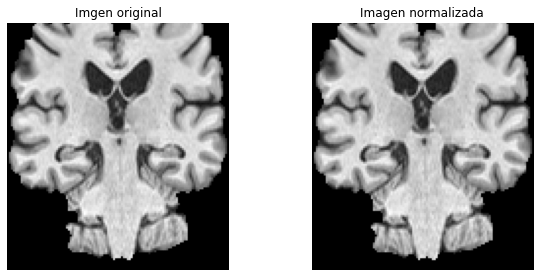

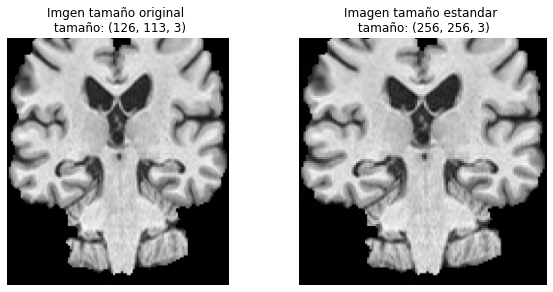

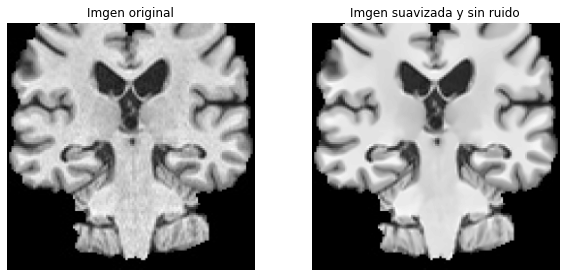

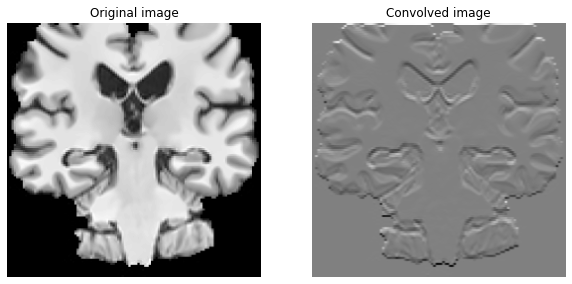

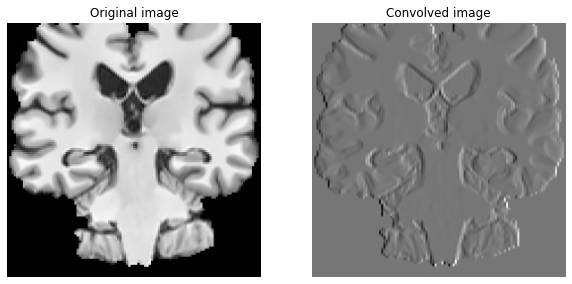

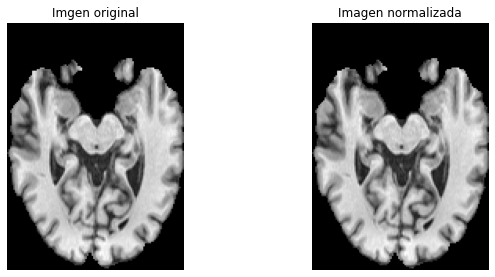

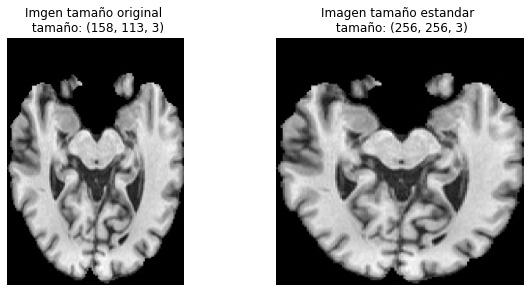

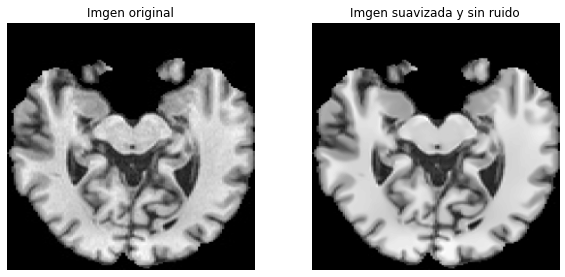

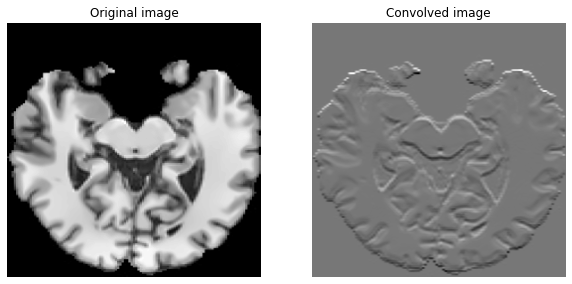

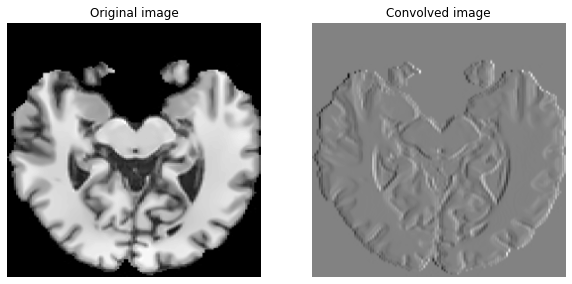

In [99]:
"""
1. Extraccion de imagenes NIFTI (.nii) de estructura jerarquica de carpetas donde se almacenan, como 
   la del ejemplo a continuacion:
   
   a. Raiz => D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI
      b. Sub folder 1 => 002_S_0295 
         c. Sub folder 2 => MPR__GradWarp__B1_Correction__N3__Scaled 
            d. Sub folder 3 => 2006-04-18_08_20_30.0 
               e. Sub folder => I45108 
                    File => ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii
                  
2. Lectura de las imagenes en formato Nifti, en 3D donde cada dimension contiene una secuencia de 
   imagenes para los cortes de las Imagenes de resonancia magnetica cerebral (Dimension 1: Axial, Dimension 2: Coronal
   y Dimesion 3:Sagital).
   
3. Crear Sub folder en el nivel "g" al interior del nivel "e" llamado "jpg" en el cual se almacenaran los cortes 
   Axial y Coronal del cerebro, ya que son las imagenes que proveen mas informacion para la deteccion del Alzheimer,
  para ambos cortes se seleccionara la imagen que se ubica en el centro de cada dimension de la imagend 3D en formato Nifti,
  ya que son las que permiten ver cada corte de manera completa.
  
4. Registra una tabla de log con la informacion de las imagenes almacenadas. 
"""
import os
import pandas as pd
import pytz
from datetime import datetime

# Dataframe para registro de log de auditoria
df_pd_log = pd.DataFrame()
df_pd_log = pd.DataFrame(columns=['image_data_id',\
                                  'subject',\
                                  'path_nii',\
                                  'file_name_nii',\
                                  'path_jpg',\
                                  'file_name_jpg',\
                                  'state',\
                                  'msg',\
                                  'creation_date'\
                                 ])

# Variables de directorios
path_root = r'D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI'



sub_folder_new_format = "\jpg_no_neck"
count_dirs = 0

# Variables de tiempo
zone = pytz.timezone('America/Bogota')
date = datetime.now(zone)
current_date = date.strftime("%d/%m/%Y %H:%M:%S")
current_date = datetime.strptime(current_date, "%d/%m/%Y %H:%M:%S")
current_date_log_file = str(date.day).zfill(2) + str(date.month).zfill(2) + str(date.year) + "_" + str(date.hour) + "_" + str(date.minute)+ "_" + str(date.second)

count_images = 0
print('Generando imagenes 2D..')
for root, dirs, files in os.walk(path_root):   
    
    dirs.sort() # ordenar subdirectorios asendente      
   
    for file in files:
        
        if file.endswith("_noneck.nii.gz"):
                                   
            list_volumen    = []
            save_path  = ''
            list_file_names = []
                               
            current_file_nii = os.path.join(root, file)  # D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\023_S_0058\MPR-R__GradWarp__B1_Correction__N3__Scaled\2006-06-22_16_13_35.0\I31008\ADNI_023_S_0058_MR_MPR-R__GradWarp__B1_Correction__N3__Scaled_Br_20061130142201343_S15796_I31008.nii     
            current_folder_nii = os.path.join(root)      # D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\023_S_0058\MPR-R__GradWarp__B1_Correction__N3__Scaled\2006-06-22_16_13_35.0\I31008               
            current_folder_new_jpg = current_folder_nii + sub_folder_new_format                                
            current_file = file[0: len(file) - 7]
                                
            # 1. Leer imagen iterada
            mri  = nib.load(current_file_nii)
            mri_data = mri.get_fdata()
            shape = mri_data.shape            
            
            # 2. Obtener los valores de las 3D del la imagen .nii
            n_i, n_j, n_k = mri_data.shape

            # 3. Obtener el ejecentral de cada dimension
            center_i = (n_i - 1) // 2  # // division entera
            center_j = (n_j - 1) // 2
            center_k = (n_k - 1) // 2

            # 4. Obtener cortes de cada dimension ubicados en el centro de cada dimension
#             slice_coronal_0 = mri_data[center_i, :, :] # Coronal
#             slice_axial_1 = mri_data[:, center_j, :] # Axial
#             slice_sagital_2 = mri_data[:, :, center_k] # Sagital
            
            slice_axial_0 = mri_data[center_i, :, :] # Axial
            slice_corona_1 = mri_data[:, center_j, :] # Coronal
            slice_sagital_2 = mri_data[:, :, center_k] # Sagital
            
            # 5. Almacenar volumenes a guardar en formato jpg           
            list_volumen.append(slice_corona_1)
            list_volumen.append(slice_axial_0)
                                 
            # 6. Almacenar ruta donde se va almacenar la imagen jpg
            save_path = current_folder_new_jpg
            
            # 7. Almacenar nombre del archivo = nombre original + _coronal o _axial
            current_file_coronal = current_file + "_coronal"
            current_file_axial = current_file + "_axial"                  
            list_file_names.append(current_file_coronal)
            list_file_names.append(current_file_axial) 
                 
            # 8. Almacenar en objeto tipo diccionario 
            list_slices_save_jpg = []
            current_dic = {}
            
            current_dic["list_volumen"] = list_volumen
            current_dic["save_path"] = save_path
            current_dic["list_file_names"] = list_file_names
                                      
            list_slices_save_jpg.append(current_dic)            
            # print(list_slices_save_jpg, "\n")
            
            # 9. Almacenar cortes en formato .jpg en sub folder contenedor de la imagen .nii
            result = save_slice_volume_in_jpg(list_slices_save_jpg, count_images)
            count_images = count_images + 1
            print(count_images)
                                                    
            # 10. Actualizar estado
            print(type(result), result)
            if result['msg_result'] == "Exito":
                #print(msg_result, "\n",  list_file_names)
                state = "Exito"               
            else:
                state = "Error"              
                print(result['msg_result'])
                print('-'*20)
                print(result['except'])
                
            # 11. Registrar log de auditoria de las imagenes almacenas en jpg   
            df_pd_log = registra_log_jpg(df_pd_log,
                                         list_file_names,
                                         current_folder_nii,
                                         current_file_nii,
                                         file,
                                         save_path,                            
                                         state,
                                         result['msg_result'],
                                         current_date)    
     
print("Fin del ciclo de almacenamiento")

# return df_pd_log
path_log_root = r"D:\ADNI - IDA\A_Metadatos\log"
file_name_ext_load = r"\dl_alzheimer_log_extraction_nii_to_jpg_" + current_date_log_file + ".csv"
path_log_ext_load = path_log_root + file_name_ext_load
print(path_log_ext_load)

df_pd_log.to_csv (path_log_ext_load, index = None, header=True)
display(df_pd_log)

## Crear tabla de metadatos

In [101]:
def crear_tbl_metadatos_consolidado():
    
    #D:\ADNI - IDA\A_Metadatos\log\dl_alzheimer_log_extraction_nii_to_jpg_18062022_20_6_38.csv
    file_demografico_metadatos = r"D:/ADNI - IDA/A_Metadatos/ADNI1_Complete_1Yr_1.5T_4_27_2022.csv"
    #file_demografico_metadatos = r"/Volumes/My Book/ADNI - IDA/A_Metadatos/ADNI1_Complete_1Yr_1.5T_4_27_2022.csv"
    df_demografico_metadatos = pd.read_csv(file_demografico_metadatos)
    df_demografico_metadatos.columns= df_demografico_metadatos.columns.str.lower()
    df_demografico_metadatos =  df_demografico_metadatos.rename(columns={"image data id": "image_data_id_m", "acq date_m": "acq_date", "subject": "subject_m", "group": "group_m"})

    #file_name_ext_load = r"D:/ADNI - IDA/A_Metadatos/log/dl_alzheimer_log_extraction_nii_to_jpg_05052022_12_32_2.csv"
    #file_name_ext_load = r"/Volumes/My Book/ADNI - IDA/A_Metadatos/log/dl_alzheimer_log_extraction_nii_to_jpg_05052022_12_32_2.csv"    
    df_log = pd.read_csv(path_log_ext_load)        

    df_metadatos_con = df_log.merge(df_demografico_metadatos,  how='inner',
                                    left_on=['image_data_id','subject'],
                                    right_on = ['image_data_id_m','subject_m'])

    df_metadatos_con['orden'] = np.arange(0, len(df_metadatos_con))

    df_metadatos_con.drop(['image_data_id_m', 'subject_m'], axis = 1, inplace = True) 

    return df_metadatos_con

In [102]:
print(path_log_ext_load)

D:\ADNI - IDA\A_Metadatos\log\dl_alzheimer_log_extraction_nii_to_jpg_19062022_12_10_40.csv


In [103]:
df_metadatos_con = crear_tbl_metadatos_consolidado()
df_metadatos_con.shape
df_metadatos_con.columns
df_metadatos_con.to_csv(r"D:/ADNI - IDA/A_Metadatos/log/log_metadatos_consolidado.csv")
           

In [104]:
df_metadatos_con.tail(3)

,image_data_id,subject,path_nii,file_name_nii,path_jpg,file_name_jpg,state,msg,creation_date,group_m,sex,age,visit,modality,description,type,acq date,format,downloaded,orden
4585,I97327,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,NaN,4585
4586,I112538,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN,4586
4587,I112538,941_S_1311,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\941...,ADNI_941_S_1311_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN,4587


In [105]:
df_metadatos_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588 entries, 0 to 4587
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image_data_id  4588 non-null   object
 1   subject        4588 non-null   object
 2   path_nii       4588 non-null   object
 3   file_name_nii  4588 non-null   object
 4   path_jpg       4588 non-null   object
 5   file_name_jpg  4588 non-null   object
 6   state          4588 non-null   object
 7   msg            4588 non-null   object
 8   creation_date  4588 non-null   object
 9   group_m        4588 non-null   object
 10  sex            4588 non-null   object
 11  age            4588 non-null   int64 
 12  visit          4588 non-null   int64 
 13  modality       4588 non-null   object
 14  description    4588 non-null   object
 15  type           4588 non-null   object
 16  acq date       4588 non-null   object
 17  format         4588 non-null   object
 18  downloaded     8 non-null   

## Registrar tabla de log en BD

In [106]:
%run ./Helpers/sqllite_helper.ipynb
helper_sqllite()

helper sqllite loaded..


In [107]:
"""Registrar log de carga"""

database = r"C:\sqllite\alzheimer_db.db"
conn = create_connection(database)

drop_table(conn, "DROP TABLE log_metadatos_consolidado")
df_metadatos_con.to_sql("log_metadatos_consolidado", con = conn)

In [108]:
query = "SELECT * FROM log_metadatos_consolidado LIMIT 3"
df_rs_query = query_table(conn, query)
df_rs_query

,index,image_data_id,subject,path_nii,file_name_nii,path_jpg,file_name_jpg,state,msg,creation_date,...,sex,age,visit,modality,description,type,acq date,format,downloaded,orden
0,0,I45108,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,...,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,4/18/2006,NiFTI,None,0
1,1,I45108,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,...,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,4/18/2006,NiFTI,None,1
2,2,I40966,002_S_0295,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,D:\ADNI - IDA\ADNI1_Complete 1Yr 1.5T\ADNI\002...,ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correctio...,Exito,Exito,2022-06-19 12:10:40,...,M,85,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,11/02/2006,NiFTI,None,2


## Exploracion de datos

In [109]:
"""Datos agrupados por rango de edades """

df_metadatos_con['rangos_edad'] = np.select(
[
    ((df_metadatos_con['age'] >= 55) & (df_metadatos_con['age'] < 67)),
    ((df_metadatos_con['age'] >= 67) & (df_metadatos_con['age'] < 79)),
    ((df_metadatos_con['age'] >= 79) & (df_metadatos_con['age'] <= 91))
    
], 
[
   "[55-67]",
   "[67-79]",
   "[79-91]"
], 
default='[]')

In [110]:

df_metadatos_con.rangos_edad.unique()

array(['[79-91]', '[67-79]', '[55-67]'], dtype=object)

In [111]:
"""Datos agrupados por rango de edades """

from pandasql import sqldf

query = "SELECT * FROM df_metadatos_con "

query = "SELECT rangos_edad as clasificacion,\
        count(*) AS cantidad \
        FROM df_metadatos_con \
        group by rangos_edad \
        order by rangos_edad "

df_metadatos_con_agg = sqldf(query)
df_metadatos_con_agg

,clasificacion,cantidad
0,[55-67],464
1,[67-79],2570
2,[79-91],1554


In [112]:
"""Datos agrupados por evolucion de la enfermedad de Alzheimer """

from pandasql import sqldf

query = "SELECT * FROM df_metadatos_con "

query = "SELECT group_m as clasificacion,\
        count(*) AS cantidad \
        FROM df_metadatos_con \
        group by group_m \
        order by group_m "

df_metadatos_con_agg = sqldf(query)
df_metadatos_con_agg

,clasificacion,cantidad
0,AD,952
1,CN,1410
2,MCI,2226


In [113]:
"""Datos agrupados por evolucion de la enfermedad de Alzheimer y Sexo """

from pandasql import sqldf

query = "SELECT * FROM df_metadatos_con "

query = "SELECT group_m as clasificacion,\
                sex as sexo,\
        count(*) AS cantidad \
        FROM df_metadatos_con \
        group by group_m,sex \
        order by group_m "

df_metadatos_con_agg = sqldf(query)
df_metadatos_con_agg

,clasificacion,sexo,cantidad
0,AD,F,442
1,AD,M,510
2,CN,F,670
3,CN,M,740
4,MCI,F,794
5,MCI,M,1432


In [114]:
"""Datos agrupados por Sexo """

from pandasql import sqldf

query = "SELECT * FROM df_metadatos_con "

query = "SELECT sex as sexo,\
        count(*) AS cantidad \
        FROM df_metadatos_con \
        group by sex \
        order by sex "

df_metadatos_con_agg = sqldf(query)
df_metadatos_con_agg

,sexo,cantidad
0,F,1906
1,M,2682


### Fuentes de datos de acceso abierto

A continuación otra pequeña muestra de fuentes de datos de acceso abierto: 
      
+ [Kaggle](https://www.kaggle.com/datasets). Se creó para ayudar a las empresas a organizar concursos de ciencia de datos para resolver problemas complejos utilizando datos. 
+ [FiveThirtyEight](https://data.fivethirtyeight.com/). Datos de periodismo. Datos detras de las noticias de política, ciencia, cultura, deportes, entre otros. Principalmente contiene información de Estados Unidos.

# References

<a name="cite-PER-GRA:2007"/><sup>[^](#ref-2) </sup>P&eacute;rez, Fernando and Granger, Brian E.. 2007. _IPython: a System for Interactive Scientific Computing_. [URL](http://ipython.org)

<a name="cite-calicoww2:2"/><sup>[^](#ref-3) </sup>Kepps, Milo . 2002. _Rebuilding Calico After Japanese Occupation_.


Alzheimer clasification: https://levelup.gitconnected.com/deep-learning-for-alzheimers-classification-57611161e442

Trabajando con datos de MRI en Python: https://lukas-snoek.com/NI-edu/fMRI-introduction/week_1/python_for_mri.html


http://openaccess.uoc.edu/webapps/o2/bitstream/10609/81588/6/seganamiTFM0618memoria.pdf

https://nipy.org/nibabel/tutorials.html#tutorials

https://facundoq.github.io/courses/aa2018/res/04_imagenes_numpy.html

https://carpentries-incubator.github.io/SDC-BIDS-IntroMRI/anatomy-of-nifti/index.html

https://dartbrains.org/content/GLM_Single_Subject_Model.html

https://peerherholz.github.io/workshop_weizmann/data/image_manipulation_nibabel.html

https://lukas-snoek.com/NI-edu/fMRI-introduction/week_1/python_for_mri.html

https://www.programcreek.com/python/example/98178/nibabel.save